# Análisis Estratégico de Precios Mayoristas para el Sector Retail de Frutas y Hortalizas

**Autor: Ricardo Urdaneta**

Fecha: 24 julio 2025


---


**FRESCORP S.A.** es una cadena de supermercados `FICTICIA`, con fuerte presencia en la venta de abarrotes, carnes y productos envasados. Recientemente, han notado un creciente interés de sus clientes por productos frescos, saludables y de origen local.

Para capitalizar esta tendencia y competir con las grandes cadenas y ferias locales, la gerencia ha decidido lanzar una nueva línea de negocio: **"FRESCORP Verde"**, dedicada exclusivamente a la venta de frutas y hortalizas de alta calidad.

>La empresa no tiene experiencia en la compra a gran escala de productos perecederos. El mercado de frutas y hortalizas es volátil y los precios cambian constantemente. Antes de invertir en logística, refrigeración y personal, necesitan un **plan de negocio basado en datos nacionales** del año recurrente para asegurar la rentabilidad del proyecto y ofrecer precios competitivos a sus clientes.

`Aclaración importante:` Para este análisis, se ha utilizado una base de datos pública correspondiente al año en curso (2025). Por este motivo, los datos reflejan la actividad del mercado únicamente hasta el mes de julio, lo cual se debe tener en cuenta al interpretar las tendencias.

---

#### Objetivos del Análisis:

Este análisis tiene como objetivo proporcionar una estrategia inicial para el lanzamiento de "FRESCORP Verde", respondiendo a preguntas críticas de negocio en tres áreas fundamentales.

---

#### Preguntas Clave:

#### Cartera de Productos
* ¿Qué productos tienen el menor costo de adquisición promedio?
* ¿Cuáles son los productos más importantes o con mayor volumen de comercialización?
* ¿Qué productos tienen la mayor diversidad de variedades en el mercado?

#### Estrategia de Precios y Promociones
* ¿Cuáles son los meses de "temporada baja" (precios más baratos) para los productos populares?
* ¿Qué productos sufren las mayores alzas de precio?

#### Optimización de la Cadena de Suministro
* ¿Hay días específicos de la semana en los que los precios mayoristas tienden a ser más bajos?
* ¿En qué mercados es más barato comprar productos clave?


---

#### Database:
Obtenida de [Kaggle](https://www.kaggle.com/datasets/ricardourdaneta/precio-mayorista-de-frutas-y-hortalizas-2025)

Importante: El siguiente análisis se basa en un conjunto de datos del año 2025. Dado que el año aún está en curso al momento de realizar este estudio, los datos disponibles solo abarcan desde enero hasta julio.

---

#### Preparamos el ambiente

Importamos las librerias que usaremos para el analisis

In [9]:
# Librerías para Manipulación y Análisis de Datos 
import pandas as pd
import numpy as np
import datetime as dt

# Librerías para Visualización de Datos
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Define la ruta del archivo CSV
file_path = 'data/lista_mayorista.csv'

# Carga el archivo CSV en un DataFrame de pandas
df = pd.read_csv(file_path)

#### Exploración de datos inicial
Exploramos la base de datos usando las funciones `df.head()` y `df.tail()`

In [11]:
# Muestra las primeras 5 filas del DataFrame
df.head()

,Fecha,ID region,Region,Mercado,Subsector,Producto,Variedad / Tipo,Calidad,Unidad de comercializacion,Origen,Volumen,Precio minimo,Precio maximo,Precio promedio ponderado
0,2025-01-02,5,Región de Valparaíso,Femacal de La Calera,Hortalizas y tubérculos,Acelga,Sin especificar,Primera,$/docena de atados (6 kilos),Provincia de Quillota,110,"4000,0000","4000,0000","4000,0000"
1,2025-01-02,8,Región del Biobío,Vega Monumental Concepción,Hortalizas y tubérculos,Acelga,Sin especificar,Primera,"$/atado 0,5 a 1 kilo",Región Metropolitana,300,"800,0000","800,0000","800,0000"
2,2025-01-02,16,Región de Ñuble,Terminal Hortofrutícola Agro Chillán,Hortalizas y tubérculos,Acelga,Sin especificar,Primera,"$/atado 0,5 a 1 kilo",Región de Ñuble,200,"600,0000","600,0000","600,0000"
3,2025-01-02,16,Región de Ñuble,Terminal Hortofrutícola Agro Chillán,Hortalizas y tubérculos,Acelga,Sin especificar,Segunda,"$/atado 0,5 a 1 kilo",Región de Ñuble,600,"500,0000","500,0000","500,0000"
4,2025-01-02,4,Región de Coquimbo,Terminal La Palmera de La Serena,Hortalizas y tubérculos,Ají,Inferno,Primera,$/caja 15 kilos,Provincia de Limarí,400,"15000,0000","17000,0000","16000,0000"


In [12]:
# Muestra las últimas 5 filas del DataFrame
df.tail()

,Fecha,ID region,Region,Mercado,Subsector,Producto,Variedad / Tipo,Calidad,Unidad de comercializacion,Origen,Volumen,Precio minimo,Precio maximo,Precio promedio ponderado
113506,2025-07-18,13,Región Metropolitana de Santiago,Vega Central Mapocho de Santiago,Hortalizas y tubérculos,Cebollín,Sin especificar,Primera,$/paquete 36 unidades,Región Metropolitana,520,"5000,0000","5200,0000","5100,0000"
113507,2025-07-18,13,Región Metropolitana de Santiago,Mercado Mayorista Lo Valledor de Santiago,Hortalizas y tubérculos,Cebollín,Sin especificar,Primera,$/paquete 36 unidades,Región Metropolitana,900,"5000,0000","5000,0000","5000,0000"
113508,2025-07-18,13,Región Metropolitana de Santiago,Vega Central Mapocho de Santiago,Hortalizas y tubérculos,Cebollín,Sin especificar,Segunda,$/paquete 36 unidades,Región Metropolitana,340,"4000,0000","4500,0000","4250,0000"
113509,2025-07-18,13,Región Metropolitana de Santiago,Mercado Mayorista Lo Valledor de Santiago,Hortalizas y tubérculos,Cebollín,Sin especificar,Segunda,$/paquete 36 unidades,Región Metropolitana,600,"4500,0000","4500,0000","4500,0000"
113510,2025-07-18,13,Región Metropolitana de Santiago,Mercado Mayorista Lo Valledor de Santiago,Hortalizas y tubérculos,Cebollín,Sin especificar,Tercera,$/paquete 36 unidades,Región Metropolitana,500,"3800,0000","3800,0000","3800,0000"


> Podemos identificar fácilmente que tenemos una mezcla de variables **categóricas, numéricas y temporales**.

Cada fila en nuestra base de datos representa un **registro de precio** en un momento específico. Es decir, nos muestra el **precio mayorista** para un **producto determinado** en una **fecha específica**.

Las columnas nos dan los detalles de este registro, incluyendo:

* **Variables Categóricas:** como `Producto` (ej: 'Tomate', 'Manzana Fuji') y `Categoría` (ej: 'Hortaliza', 'Fruta').
* **Variables Numéricas:** como el `Precio`.
* **Variable Temporal:** que es la `Fecha` del registro.

Esta estructura es ideal para analizar tendencias de precios, estacionalidad y volatilidad, que son los objetivos centrales del proyecto.

Ahora usamos las funciones `df.shape` y `df.info()` para obtener mas información de nuestra base de datos:

In [13]:
# Muestra la forma del DataFrame (número de filas y columnas)
df.shape

(113511, 14)

In [14]:
# Muestra información detallada del DataFrame, incluyendo tipos de datos y memoria utilizada
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113511 entries, 0 to 113510
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Fecha                       113511 non-null  object
 1   ID region                   113511 non-null  int64 
 2   Region                      113511 non-null  object
 3   Mercado                     113511 non-null  object
 4   Subsector                   113511 non-null  object
 5   Producto                    113511 non-null  object
 6   Variedad / Tipo             113511 non-null  object
 7   Calidad                     113511 non-null  object
 8   Unidad de comercializacion  113511 non-null  object
 9   Origen                      113511 non-null  object
 10  Volumen                     113511 non-null  int64 
 11  Precio minimo               113511 non-null  object
 12  Precio maximo               113511 non-null  object
 13  Precio promedio ponderado   1

Con estas funciones obtenemos la primera radiografía de nuestra base de datos y nos revela:
* La magnitud de la base de datos con 113511 registros en 14 columnas.
* Los tipos de datos de las columnas y que debemos realizar ciertas conversiones para poder trabajar adecuadamente

### Conversiones
* Columna `Fecha` (tipo object) a tipo datetime.
* Las columnas de `Precio minimo`, `Precio maximo` y `Precio promedio ponderado` se deben limpiar reemplazando las `,` en `.` para luego poder convertirlo a float.


In [15]:
# Convierte la columna 'Fecha' a tipo datetime
df['Fecha'] = pd.to_datetime(df['Fecha'])

In [16]:
# Lista de las columnas de precios que convertiremos
columnas_precio = ['Precio minimo', 'Precio maximo', 'Precio promedio ponderado']

# Bucle para limpiar y convertir cada columna
for col in columnas_precio:
  # Reemplaza la coma decimal por un punto
  df[col] = df[col].str.replace(',', '.', regex=False)
  # Convierte la columna a tipo numérico (float)
  df[col] = pd.to_numeric(df[col])

# Verifica que los tipos de datos han cambiado a float64
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113511 entries, 0 to 113510
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Fecha                       113511 non-null  datetime64[ns]
 1   ID region                   113511 non-null  int64         
 2   Region                      113511 non-null  object        
 3   Mercado                     113511 non-null  object        
 4   Subsector                   113511 non-null  object        
 5   Producto                    113511 non-null  object        
 6   Variedad / Tipo             113511 non-null  object        
 7   Calidad                     113511 non-null  object        
 8   Unidad de comercializacion  113511 non-null  object        
 9   Origen                      113511 non-null  object        
 10  Volumen                     113511 non-null  int64         
 11  Precio minimo               113511 non-

### Limpieza de datos

Podemos apreciar rápidamente que no hay valores nulos, sin embargo y por buena práctica, lo confirmamos con la función `df.isnull().sum()`

In [17]:
# Verificamos si hay valores nulos en el DataFrame
df.isnull().sum()

Fecha                         0
ID region                     0
Region                        0
Mercado                       0
Subsector                     0
Producto                      0
Variedad / Tipo               0
Calidad                       0
Unidad de comercializacion    0
Origen                        0
Volumen                       0
Precio minimo                 0
Precio maximo                 0
Precio promedio ponderado     0
dtype: int64

Así mismo también verificaremos los duplicados con la función `df.duplicated().sum()`

In [18]:
# Verificamos si hay duplicados en el DataFrame
df.duplicated().sum()

np.int64(0)

### Renombrar las columnas

In [19]:
# Renombramos, incluyendo un paso final para corregir dobles guiones bajos
df.columns = [col.lower().replace(' ', '_').replace('/', '_').replace('__', '_') for col in df.columns]

# Muestra los nombres corregidos para verificar
print(df.columns)

Index(['fecha', 'id_region', 'region', 'mercado', 'subsector', 'producto',
       'variedad__tipo', 'calidad', 'unidad_de_comercializacion', 'origen',
       'volumen', 'precio_minimo', 'precio_maximo',
       'precio_promedio_ponderado'],
      dtype='object')


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113511 entries, 0 to 113510
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   fecha                       113511 non-null  datetime64[ns]
 1   id_region                   113511 non-null  int64         
 2   region                      113511 non-null  object        
 3   mercado                     113511 non-null  object        
 4   subsector                   113511 non-null  object        
 5   producto                    113511 non-null  object        
 6   variedad__tipo              113511 non-null  object        
 7   calidad                     113511 non-null  object        
 8   unidad_de_comercializacion  113511 non-null  object        
 9   origen                      113511 non-null  object        
 10  volumen                     113511 non-null  int64         
 11  precio_minimo               113511 non-

---
### Estandarización de la columna unidad_de_comercializacion

Al haber hecho un repaso rápido de nuestra data base, descubrimos que la columna unidad_de_comercializacion era clave para todo el analisi, sin embargo, vemos que tiene todo tipo de medidas diferentes entre pesos y unidades. Debemos estandarizar para realizar una comparación justa y precisa entre productos. 

El problema es que como ya se mencionó, no se puede comparar directamente el precio de una "caja de 15 kilos" con el de un "atado de 6 unidades". Al crear las columnas precio_por_kg y precio_por_unidad, traducimos todos los productos a una unidad común y será la base para responder todas las preguntas de negocio clave.

#### Estardarización de los productos que se venden por kilogramo

Paso 1: Extraer el Peso en KG.

Nos ocuparemos de los casos donde el peso en kilogramos está claramente indicado en la descripción.

Usaremos una expresión regular para buscar un número dentro de un paréntesis que esté asociado a "kg" o "kilo".

In [21]:
# Regex: busca un número seguido de un espacio y las palabras 'kilo', 'kilos' o 'kg'
regex_mejorado = r'(\d+)\s*(?:kilos|kilo|kg)'

# Extraer el peso usando el regex.
# Esto reemplazará la columna 'peso_kg' anterior con una mucho más completa.
df['peso_kg'] = df['unidad_de_comercializacion'].str.extract(regex_mejorado, expand=False)
df['peso_kg'] = pd.to_numeric(df['peso_kg'])

Paso 2: Calcular el Precio por Kilo.

Con los pesos que acabamos de extraer, ya podemos calcular nuestra métrica estandarizada para una gran parte del dataset.

In [22]:
# (Re)calcular el precio por kilo con los nuevos datos
df['precio_por_kg'] = df['precio_promedio_ponderado'] / df['peso_kg']

# --- Verificación ---
print(f"Total de pesos extraídos con el código mejorado: {df['peso_kg'].notna().sum()}")

# Mostramos algunas filas para confirmar que funcionó correctamente
display(df[df['unidad_de_comercializacion'].str.contains('caja 10 kilos', na=False)].head())

Total de pesos extraídos con el código mejorado: 78873


,fecha,id_region,region,mercado,subsector,producto,variedad__tipo,calidad,unidad_de_comercializacion,origen,volumen,precio_minimo,precio_maximo,precio_promedio_ponderado,peso_kg,precio_por_kg
12,2025-01-02,9,Región de La Araucanía,Vega Modelo de Temuco,Hortalizas y tubérculos,Ají,Inferno,Primera,$/caja 10 kilos,Región de Arica y Parinacota,125,25000.0,25000.0,25000.0000,10.0,2500.00000
13,2025-01-02,13,Región Metropolitana de Santiago,Mercado Mayorista Lo Valledor de Santiago,Hortalizas y tubérculos,Ajo,Chino,Primera,$/caja 10 kilos,China,1200,20000.0,20000.0,20000.0000,10.0,2000.00000
14,2025-01-02,16,Región de Ñuble,Terminal Hortofrutícola Agro Chillán,Hortalizas y tubérculos,Ajo,Chino,Primera,$/caja 10 kilos,China,80,23000.0,23000.0,23000.0000,10.0,2300.00000
15,2025-01-02,8,Región del Biobío,Vega Monumental Concepción,Hortalizas y tubérculos,Ajo,Chino,Primera,$/caja 10 kilos,China,350,23000.0,24000.0,23428.5714,10.0,2342.85714
16,2025-01-02,5,Región de Valparaíso,Femacal de La Calera,Hortalizas y tubérculos,Ajo,Chino,Primera,$/caja 10 kilos,China,40,20000.0,20000.0,20000.0000,10.0,2000.00000


### Estandarizar los productos que se venden por unidad.

Como también pudimos observar, no solo hay distintos tipos de medidas en `kilos` sino que tambien los hay en `unidades`

El objetivo será crear dos nuevas columnas:

`numero_unidades`: Para guardar la cantidad de unidades (ej: 5, 36, etc.).

`precio_por_unidad`: Para calcular el precio de una sola unidad.

Paso 1: Extraer la Cantidad de Unidades

Usaremos una expresión regular para extraer el número que aparece antes de la palabra "unidades".

In [23]:
# Regex: busca un número seguido de un espacio y la palabra 'unidades' o 'unidad'
regex_unidades = r'(\d+)\s*unidades?'

# Extraemos el número y lo guardamos en una nueva columna
df['numero_unidades'] = df['unidad_de_comercializacion'].str.extract(regex_unidades, expand=False)

# Convertimos a tipo numérico
df['numero_unidades'] = pd.to_numeric(df['numero_unidades'])

print("Valores de unidades extraídos:")
display(df[df['numero_unidades'].notna()][['unidad_de_comercializacion', 'numero_unidades']].head())

Valores de unidades extraídos:


,unidad_de_comercializacion,numero_unidades
60,$/caja 50 unidades,50.0
61,$/caja 60 unidades,60.0
62,$/caja 40 unidades,40.0
63,$/caja 40 unidades,40.0
64,$/caja 40 unidades,40.0


Paso 2: Manejar Casos de "Unidad" (en singular)

Algunas descripciones podrían decir simplemente "unidad", lo que implica que es solo una. El código anterior no captura esto porque no hay un número explícito. Vamos a corregir esos casos y asignarles el valor 1.

In [24]:
# Buscamos filas que contienen 'unidad' pero donde no pudimos extraer un número y les asignamos el valor 1
condicion = df['unidad_de_comercializacion'].str.contains('unidad', na=False) & df['numero_unidades'].isnull()
df.loc[condicion, 'numero_unidades'] = 1

print("\nCasos de 'unidad' singular corregidos:")
display(df[condicion][['unidad_de_comercializacion', 'numero_unidades']].head())


Casos de 'unidad' singular corregidos:


,unidad_de_comercializacion,numero_unidades
70,$/unidad,1.0
77,$/unidad,1.0
78,$/unidad,1.0
79,$/unidad,1.0
80,$/unidad,1.0


Paso 3: Calcular el Precio por Unidad

Ahora que tenemos la cantidad de unidades, podemos calcular el precio estandarizado por unidad.

In [25]:
# Calculamos el precio por unidad
df['precio_por_unidad'] = df['precio_promedio_ponderado'] / df['numero_unidades']

# Mostramos un resumen final
print("\nResumen con la nueva columna 'precio_por_unidad':")
display(df[df['precio_por_unidad'].notna()][['producto', 'unidad_de_comercializacion', 'numero_unidades', 'precio_por_unidad']].head())


Resumen con la nueva columna 'precio_por_unidad':


,producto,unidad_de_comercializacion,numero_unidades,precio_por_unidad
60,Berenjena,$/caja 50 unidades,50.0,130.000000
61,Berenjena,$/caja 60 unidades,60.0,72.222222
62,Berenjena,$/caja 40 unidades,40.0,212.500000
63,Berenjena,$/caja 40 unidades,40.0,225.000000
64,Berenjena,$/caja 40 unidades,40.0,212.500000


Con esto, hemos estandarizado exitosamente los productos que se venden por unidad. Ahora tenemos  dos métricas nuevas: `precio_por_kg` y `precio_por_unidad`.

In [26]:
# Verificamos que las nuevas columnas se han añadido correctamente
df.head(10)

,fecha,id_region,region,mercado,subsector,producto,variedad__tipo,calidad,unidad_de_comercializacion,origen,volumen,precio_minimo,precio_maximo,precio_promedio_ponderado,peso_kg,precio_por_kg,numero_unidades,precio_por_unidad
0,2025-01-02,5,Región de Valparaíso,Femacal de La Calera,Hortalizas y tubérculos,Acelga,Sin especificar,Primera,$/docena de atados (6 kilos),Provincia de Quillota,110,4000.0,4000.0,4000.0000,6.0,666.666667,NaN,NaN
1,2025-01-02,8,Región del Biobío,Vega Monumental Concepción,Hortalizas y tubérculos,Acelga,Sin especificar,Primera,"$/atado 0,5 a 1 kilo",Región Metropolitana,300,800.0,800.0,800.0000,1.0,800.000000,NaN,NaN
2,2025-01-02,16,Región de Ñuble,Terminal Hortofrutícola Agro Chillán,Hortalizas y tubérculos,Acelga,Sin especificar,Primera,"$/atado 0,5 a 1 kilo",Región de Ñuble,200,600.0,600.0,600.0000,1.0,600.000000,NaN,NaN
3,2025-01-02,16,Región de Ñuble,Terminal Hortofrutícola Agro Chillán,Hortalizas y tubérculos,Acelga,Sin especificar,Segunda,"$/atado 0,5 a 1 kilo",Región de Ñuble,600,500.0,500.0,500.0000,1.0,500.000000,NaN,NaN
4,2025-01-02,4,Región de Coquimbo,Terminal La Palmera de La Serena,Hortalizas y tubérculos,Ají,Inferno,Primera,$/caja 15 kilos,Provincia de Limarí,400,15000.0,17000.0,16000.0000,15.0,1066.666667,NaN,NaN
5,2025-01-02,4,Región de Coquimbo,Terminal La Palmera de La Serena,Hortalizas y tubérculos,Ají,Inferno,Segunda,$/caja 15 kilos,Provincia de Limarí,240,12000.0,13000.0,12500.0000,15.0,833.333333,NaN,NaN
6,2025-01-02,13,Región Metropolitana de Santiago,Mercado Mayorista Lo Valledor de Santiago,Hortalizas y tubérculos,Ají,Americana (o),Primera,$/caja 25 kilos,Provincia de Limarí,60,28000.0,28000.0,28000.0000,25.0,1120.000000,NaN,NaN
7,2025-01-02,9,Región de La Araucanía,Vega Modelo de Temuco,Hortalizas y tubérculos,Ají,Americana (o),Primera,$/caja 25 kilos,Provincia de Limarí,55,35000.0,35000.0,35000.0000,25.0,1400.000000,NaN,NaN
8,2025-01-02,13,Región Metropolitana de Santiago,Mercado Mayorista Lo Valledor de Santiago,Hortalizas y tubérculos,Ají,Americana (o),Segunda,$/caja 25 kilos,Provincia de Limarí,40,25000.0,25000.0,25000.0000,25.0,1000.000000,NaN,NaN
9,2025-01-02,5,Región de Valparaíso,Femacal de La Calera,Hortalizas y tubérculos,Ají,Inferno,Primera,$/caja 15 kilos,Limache,45,29000.0,30000.0,29555.5555,15.0,1970.370367,NaN,NaN


### Filtrar casos que no se adaptaron a las dos nuevas categorias generadas (por kilo o unidad)
Para saber cuántas filas no tienen valor ni en `peso_kg` ni en `numero_unidades`, usamos una condición que filtre los casos en los que ambas columnas son nulas.

In [27]:
# Condición: busca filas donde 'peso_kg' es nulo Y 'numero_unidades' también es nulo
filas_sin_asignar = df[df['peso_kg'].isnull() & df['numero_unidades'].isnull()]

# Contamos cuántas filas cumplen esa condición
total_sin_asignar = len(filas_sin_asignar)

print(f"Número total de filas sin asignar: {total_sin_asignar}")

# Muestra las primeras 5 filas que no fueron asignadas
print("\nEjemplos de filas no asignadas:")
display(filas_sin_asignar[['unidad_de_comercializacion', 'producto']].head(10))

Número total de filas sin asignar: 5229

Ejemplos de filas no asignadas:


,unidad_de_comercializacion,producto
23,$/docena de matas,Albahaca
24,$/docena de matas,Albahaca
25,$/docena de matas,Albahaca
26,$/docena de matas,Albahaca
27,$/docena de matas,Apio
28,$/docena de matas,Apio
29,$/docena de matas,Apio
30,$/docena de matas,Apio
31,$/docena de matas,Apio
32,$/docena de matas,Apio


Descubrimos que "docena" es una palabra clave que podemos convertir a un número específico.

Usaremos un código para buscar la palabra "docena" y asignar el valor 12 a la columna `numero_unidades` en las filas correspondientes (estamos aplicando la misma lógica que usamos para la "unidad" singular).

In [28]:
# Condición: busca filas que contienen 'docena' y donde 'numero_unidades' aún no ha sido asignado.
condicion_docena = df['unidad_de_comercializacion'].str.contains('docena', na=False) & df['numero_unidades'].isnull()

# Asignamos el valor 12 a esas filas
df.loc[condicion_docena, 'numero_unidades'] = 12

# --- Verificación ---
print("Filas con 'docena' actualizadas a 12 unidades:")
display(df[condicion_docena][['unidad_de_comercializacion', 'numero_unidades']])

Filas con 'docena' actualizadas a 12 unidades:


,unidad_de_comercializacion,numero_unidades
0,$/docena de atados (6 kilos),12.0
23,$/docena de matas,12.0
24,$/docena de matas,12.0
25,$/docena de matas,12.0
26,$/docena de matas,12.0
...,...,...
113281,$/docena de atados,12.0
113282,$/docena de atados,12.0
113286,$/docena de atados (2 kilos),12.0
113358,$/docena de paquetes,12.0


### Actualizar el Precio por Unidad
Ahora que hemos añadido más valores a numero_unidades, debemos volver a ejecutar el cálculo del precio_por_unidad para que estas nuevas filas también tengan su precio estandarizado.

In [29]:
# Recalculamos el precio por unidad para incluir los nuevos valores
df['precio_por_unidad'] = df['precio_promedio_ponderado'] / df['numero_unidades']

print("\nVerificación del precio por unidad para las docenas:")
display(df[condicion_docena][['unidad_de_comercializacion', 'precio_promedio_ponderado', 'numero_unidades', 'precio_por_unidad']])


Verificación del precio por unidad para las docenas:


,unidad_de_comercializacion,precio_promedio_ponderado,numero_unidades,precio_por_unidad
0,$/docena de atados (6 kilos),4000.0000,12.0,333.333333
23,$/docena de matas,2900.0000,12.0,241.666667
24,$/docena de matas,3500.0000,12.0,291.666667
25,$/docena de matas,3277.7777,12.0,273.148142
26,$/docena de matas,2500.0000,12.0,208.333333
...,...,...,...,...
113281,$/docena de atados,11000.0000,12.0,916.666667
113282,$/docena de atados,12000.0000,12.0,1000.000000
113286,$/docena de atados (2 kilos),6000.0000,12.0,500.000000
113358,$/docena de paquetes,9595.2380,12.0,799.603167


#### Revisamos de nuevo cuantos registros quedaron sin clasificar en las nuevas 2 columnas

In [30]:
# Condición: busca filas donde 'peso_kg' es nulo Y 'numero_unidades' también es nulo
filas_sin_asignar = df[df['peso_kg'].isnull() & df['numero_unidades'].isnull()]

# Contamos cuántas filas cumplen esa condición
total_sin_asignar = len(filas_sin_asignar)

print(f"Número total de filas sin asignar: {total_sin_asignar}")

Número total de filas sin asignar: 1254


Decidimos no trabajar con ellas ya que representan una porción pequeña del total y eliminarlas simplificaría el análisis sin afectar significativamente el resultado.

#### Eliminar las filas no clasificadas
Crearemos un nuevo DataFrame que contenga únicamente las filas que sí pudimos clasificar (es decir, que tienen un valor en peso_kg o en numero_unidades).

In [31]:
# Condición: Mantener filas donde 'peso_kg' NO es nulo O 'numero_unidades' NO es nulo
condicion_mantener = df['peso_kg'].notna() | df['numero_unidades'].notna()

# Creamos un nuevo DataFrame1
df1 = df[condicion_mantener].copy()

print(f"Tamaño original del DataFrame: {len(df)} filas")
print(f"Tamaño del nuevo DataFrame limpio: {len(df1)} filas")

Tamaño original del DataFrame: 113511 filas
Tamaño del nuevo DataFrame limpio: 112257 filas


Ahora que extrajimos toda la información valiosa de esta columna y eliminamos las filas que no servían, ya no la necesitamos.

In [32]:
# Eliminamos la columna original del nuevo DataFrame
df1 = df1.drop(columns=['unidad_de_comercializacion'])

# Verificamos las columnas restantes
print("\nColumnas del DataFrame final:")
print(df1.columns)


Columnas del DataFrame final:
Index(['fecha', 'id_region', 'region', 'mercado', 'subsector', 'producto',
       'variedad__tipo', 'calidad', 'origen', 'volumen', 'precio_minimo',
       'precio_maximo', 'precio_promedio_ponderado', 'peso_kg',
       'precio_por_kg', 'numero_unidades', 'precio_por_unidad'],
      dtype='object')


### Enrriqueceremos la columna de `Fecha` 
Esto para poder analizar tendencias de fecha, día, estación o tiempo.

Extraemos el mes y el dia de la columna `Fecha` y creamos dos nuevas columnas con estos datos.

In [33]:
# Extrae el mes y el día de la semana
df1['mes'] = df1['fecha'].dt.month
df1['dia_semana'] = df1['fecha'].dt.day_name()

# Verificamos las nuevas columnas
display(df1[['fecha', 'mes', 'dia_semana']].head())

,fecha,mes,dia_semana
0,2025-01-02,1,Thursday
1,2025-01-02,1,Thursday
2,2025-01-02,1,Thursday
3,2025-01-02,1,Thursday
4,2025-01-02,1,Thursday


Y eliminamos la  `id_region` ya que en este caso en particular seria redundar y en todo caso, es mas facil interpretar la columna `region`

In [34]:
# Elimina la columna 'id_region'
df1 = df1.drop(columns=['id_region'])

### Reordenamos las columnas 

Preferimos tener las nuevas columnas `mes` y `dia_semana` justo al lado de fecha para una mejor organización y visualización.

In [39]:
# Define el nuevo orden de las columnas restantes
nuevo_orden = [
    'fecha',
    'mes',
    'dia_semana',
    'region',
    'mercado',
    'subsector',
    'producto',
    'variedad__tipo',
    'calidad',
    'origen',
    'volumen',
    'precio_minimo',
    'precio_maximo',
    'precio_promedio_ponderado',
    'peso_kg',
    'precio_por_kg',
    'numero_unidades',
    'precio_por_unidad'
]

# Reordena el DataFrame
df1 = df1[nuevo_orden]

# Muestra el resultado final
print("DataFrame final")
display(df1.head())

DataFrame final


,fecha,mes,dia_semana,region,mercado,subsector,producto,variedad__tipo,calidad,origen,volumen,precio_minimo,precio_maximo,precio_promedio_ponderado,peso_kg,precio_por_kg,numero_unidades,precio_por_unidad
0,2025-01-02,1,Thursday,Región de Valparaíso,Femacal de La Calera,Hortalizas y tubérculos,Acelga,Sin especificar,Primera,Provincia de Quillota,110,4000.0,4000.0,4000.0,6.0,666.666667,12.0,333.333333
1,2025-01-02,1,Thursday,Región del Biobío,Vega Monumental Concepción,Hortalizas y tubérculos,Acelga,Sin especificar,Primera,Región Metropolitana,300,800.0,800.0,800.0,1.0,800.000000,NaN,NaN
2,2025-01-02,1,Thursday,Región de Ñuble,Terminal Hortofrutícola Agro Chillán,Hortalizas y tubérculos,Acelga,Sin especificar,Primera,Región de Ñuble,200,600.0,600.0,600.0,1.0,600.000000,NaN,NaN
3,2025-01-02,1,Thursday,Región de Ñuble,Terminal Hortofrutícola Agro Chillán,Hortalizas y tubérculos,Acelga,Sin especificar,Segunda,Región de Ñuble,600,500.0,500.0,500.0,1.0,500.000000,NaN,NaN
4,2025-01-02,1,Thursday,Región de Coquimbo,Terminal La Palmera de La Serena,Hortalizas y tubérculos,Ají,Inferno,Primera,Provincia de Limarí,400,15000.0,17000.0,16000.0,15.0,1066.666667,NaN,NaN


### Guardamos el nuevo dataframe limpio

In [40]:
# Definimos la ruta donde guardaremos el DataFrame limpio
ruta_guardado = 'data/df1.csv'

# Guarda el DataFrame limpio en la ruta especificada
df1.to_csv(ruta_guardado, index=False)

print(f"Guardado exitosamente en: {ruta_guardado}")

Guardado exitosamente en: data/df1.csv


### Resumen estadístico
Obtenemos un resumen estadistico con la función `.describe()` para obtener una vista rápida de los valores con los que trabajaremos.

In [41]:
df1.describe()

,fecha,mes,volumen,precio_minimo,precio_maximo,precio_promedio_ponderado,peso_kg,precio_por_kg,numero_unidades,precio_por_unidad
count,112257,112257.000000,112257.000000,112257.000000,112257.000000,112257.000000,78873.000000,78873.000000,34460.000000,34460.000000
mean,2025-04-09 06:57:13.271867392,3.790107,1098.671397,26655.939808,27345.135412,26999.125233,50.134634,952.833453,16.256152,722.186717
min,2025-01-02 00:00:00,1.000000,1.000000,40.000000,50.000000,44.375000,1.000000,2.444444,1.000000,4.000000
25%,2025-02-18 00:00:00,2.000000,100.000000,4500.000000,5000.000000,4500.000000,15.000000,472.222222,1.000000,250.000000
50%,2025-04-08 00:00:00,4.000000,250.000000,10000.000000,11000.000000,10357.142800,18.000000,800.000000,12.000000,500.000000
75%,2025-05-29 00:00:00,5.000000,520.000000,18000.000000,18000.000000,18000.000000,20.000000,1194.111111,18.000000,1000.000000
max,2025-07-18 00:00:00,7.000000,269000.000000,720000.000000,720000.000000,720000.000000,450.000000,15000.000000,200.000000,16000.000000
std,NaN,1.937215,6351.550976,65775.579085,66991.046961,66368.466789,112.499000,736.492914,21.143497,671.518689


### Buscar valores atípicos extremos

Visualizacion rápida de un boxplot en busca de valores atípicos extremos respecto a productos que se venden por kilo.

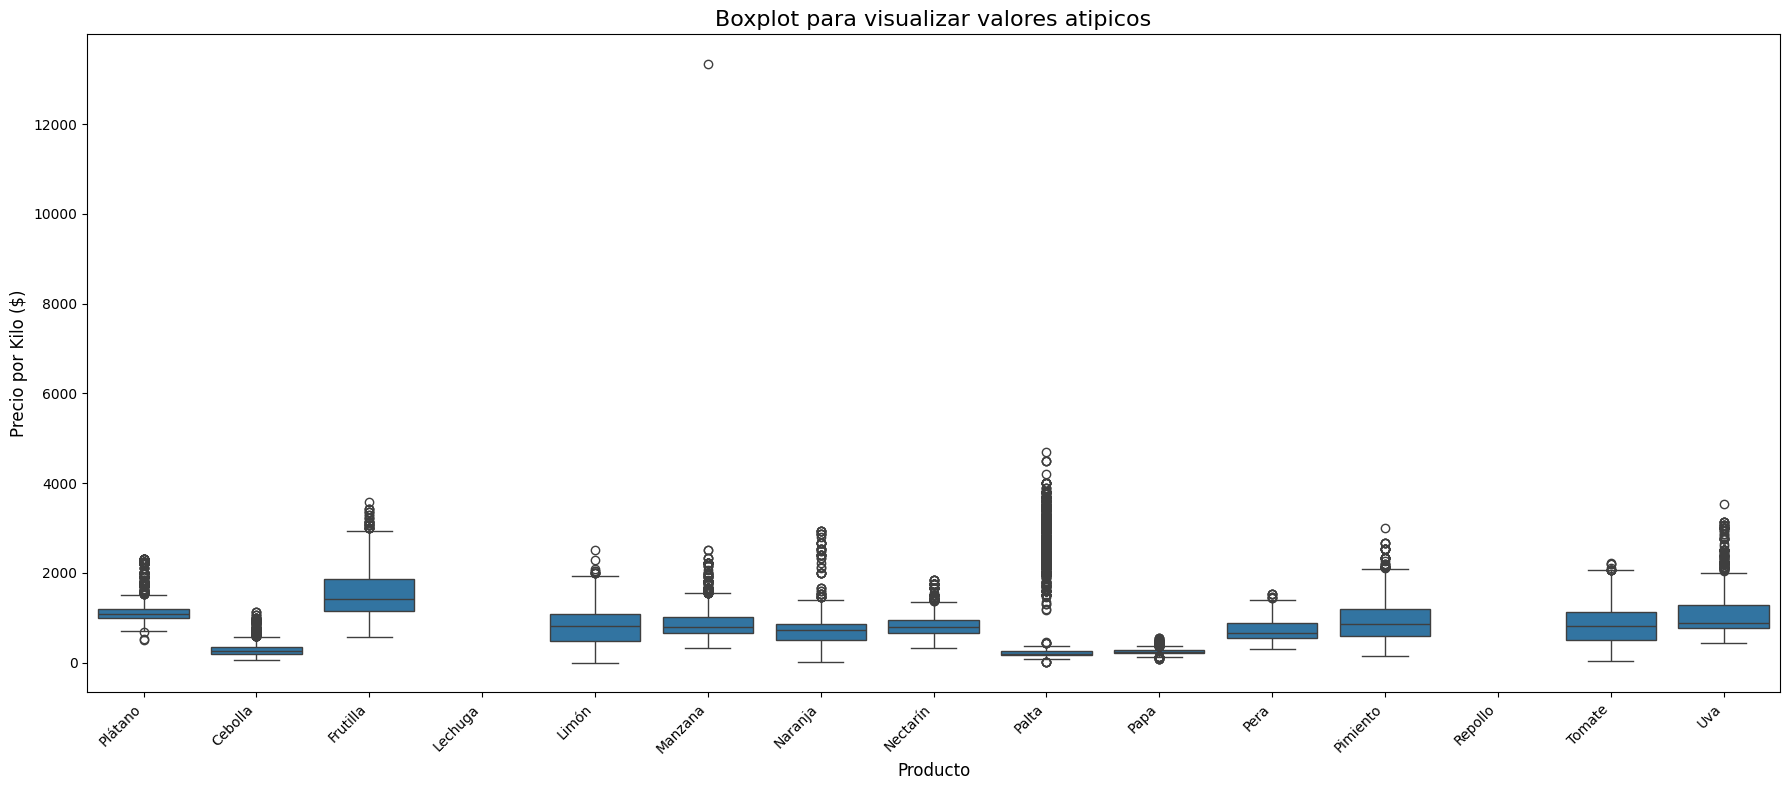

In [ ]:
# 1. Encontrar los 15 productos más comunes
top_15_productos = df1['producto'].value_counts().nlargest(15).index

# 2. Filtrar el DataFrame para incluir solo esos productos
df_top_productos = df1[df1['producto'].isin(top_15_productos)]

# 3. Crear el boxplot
plt.figure(figsize=(18, 8)) # Hacemos la figura más grande
sns.boxplot(data=df_top_productos, x='producto', y='precio_por_kg')
plt.title('Boxplot para visualizar valores atipicos', fontsize=16)
plt.xlabel('Producto', fontsize=12)
plt.ylabel('Precio por Kilo ($)', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotamos las etiquetas para que no se superpongan
plt.tight_layout() # Ajusta el gráfico para que todo quepa bien
plt.show()

Podemos ver un valor atípico extremo con el producto de `manzana` que distorciona enormemente el gráfico, lo ubicaremos y eliminaremos ya que probablemente sea un error de ingreso de datos.

In [ ]:
# Encontrar el valor máximo (el outlier extremo) para la manzana
valor_extremo = df1[df1['producto'] == 'Manzana']['precio_por_kg'].max()

print(valor_extremo)

13333.333333333334


In [ ]:
# Obtener el índice de esa fila específica
indice_a_eliminar = df1[(df1['producto'] == 'Manzana') & (df1['precio_por_kg'] == valor_extremo)].index

# Eliminar la fila del DataFrame
df1.drop(index=indice_a_eliminar, inplace=True)

print(f"Se ha eliminado la fila con el precio extremo de: ${valor_extremo:,.2f}")

Se ha eliminado la fila con el precio extremo de: $13,333.33


C:\Users\fabri\AppData\Local\Temp\ipykernel_17280\3009909046.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(index=indice_a_eliminar, inplace=True)


Pedimos de nuevo la visualizacion del gráfico anterior para confirmar los cambios.

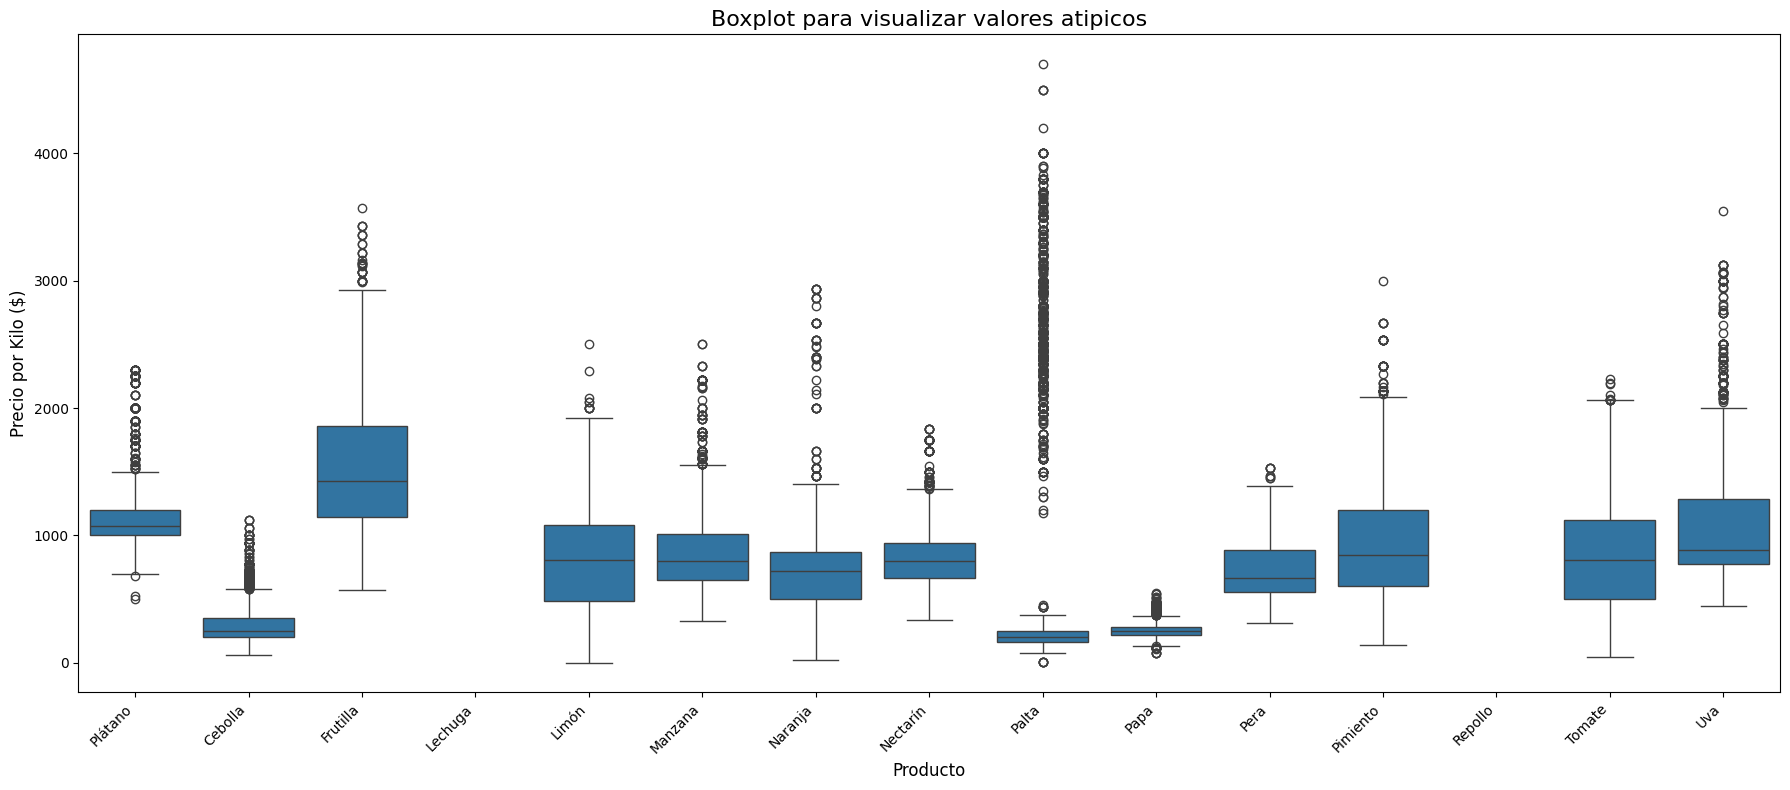

In [ ]:
# Boxplot para visualizar los valores atípicos después de la eliminación
plt.figure(figsize=(18, 8)) # Hacemos la figura más grande
sns.boxplot(data=df_top_productos, x='producto', y='precio_por_kg')
plt.title('Boxplot para visualizar valores atipicos', fontsize=16)
plt.xlabel('Producto', fontsize=12)
plt.ylabel('Precio por Kilo ($)', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotamos las etiquetas para que no se superpongan
plt.tight_layout() # Ajusta el gráfico para que todo quepa bien
plt.show()

Al eliminar ese valor extremo, el gráfico ahora ofrece una visión mucho más realista y útil de los precios de la manzana y su relación con los otros productos.



Crearemos ahora un boxplot para verificar valores atipicos respecto a productos que se venden por `unidad`

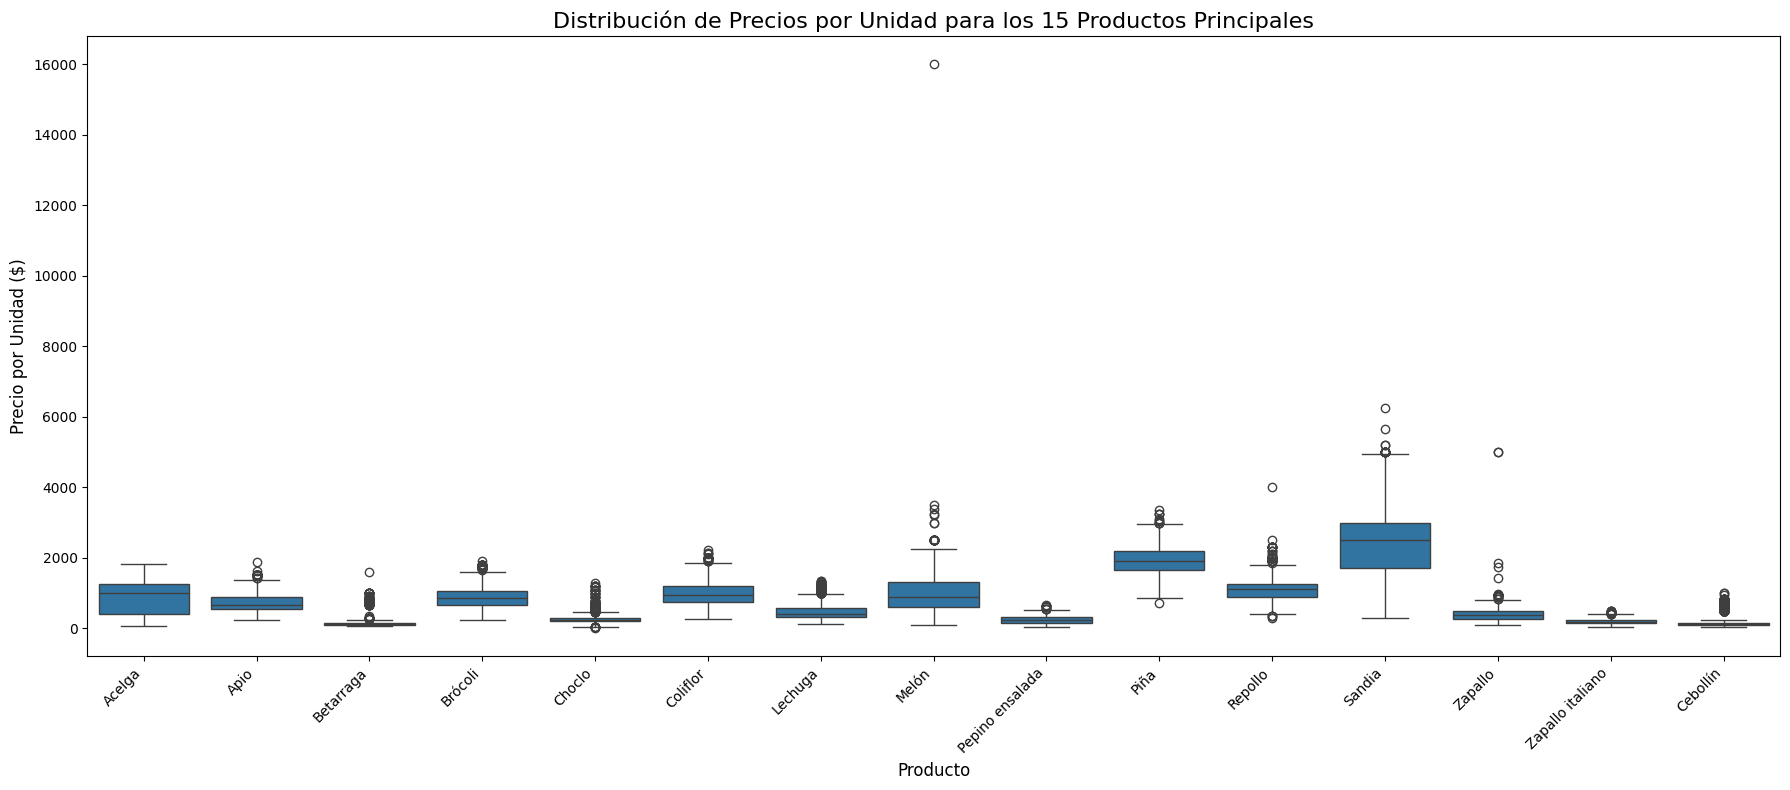

In [ ]:
# Filtrar el DataFrame para obtener solo productos con precio por unidad
df_unidades = df1[df1['precio_por_unidad'].notna()]

# Encontrar los 15 productos más comunes que se venden por unidad
top_15_productos_unidad = df_unidades['producto'].value_counts().nlargest(15).index

# Filtrar el DataFrame para incluir solo esos productos
df_top_unidades = df_unidades[df_unidades['producto'].isin(top_15_productos_unidad)]

# Crear el boxplot
plt.figure(figsize=(18, 8))
sns.boxplot(data=df_top_unidades, x='producto', y='precio_por_unidad')
plt.title('Distribución de Precios por Unidad para los 15 Productos Principales', fontsize=16)
plt.xlabel('Producto', fontsize=12)
plt.ylabel('Precio por Unidad ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Se puede ver que de igual manera del boxplot anterior, hay un valor atípico extremo que distorsiona el gráfico, lo localizaremos y eliminaremos de la misma manera como se hizo anteriormente.

In [ ]:
# Encontrar el valor máximo (el outlier extremo) para el melón
valor_extremo_melon = df1[df1['producto'] == 'Melón']['precio_por_unidad'].max()
print(valor_extremo_melon)

3371.4285


In [ ]:
# Encontrar el valor máximo por unidad (el outlier extremo) para el melón
valor_extremo_melon = df1[df1['producto'] == 'Melón']['precio_por_unidad'].max()

# Obtener el índice de esa fila
indice_melon = df1[(df1['producto'] == 'Melón') & (df1['precio_por_unidad'] == valor_extremo_melon)].index

# Eliminar la fila del DataFrame
df1.drop(index=indice_melon, inplace=True)

print(f"Se ha eliminado la fila del producto 'Melón' con el precio extremo por unidad de: ${valor_extremo_melon:,.2f}")

Se ha eliminado la fila del producto 'Melón' con el precio extremo por unidad de: $3,371.43


C:\Users\fabri\AppData\Local\Temp\ipykernel_17280\1440697220.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(index=indice_melon, inplace=True)


Volvemos a hacer el gráfico para confirmar que se realizaron los cambios.

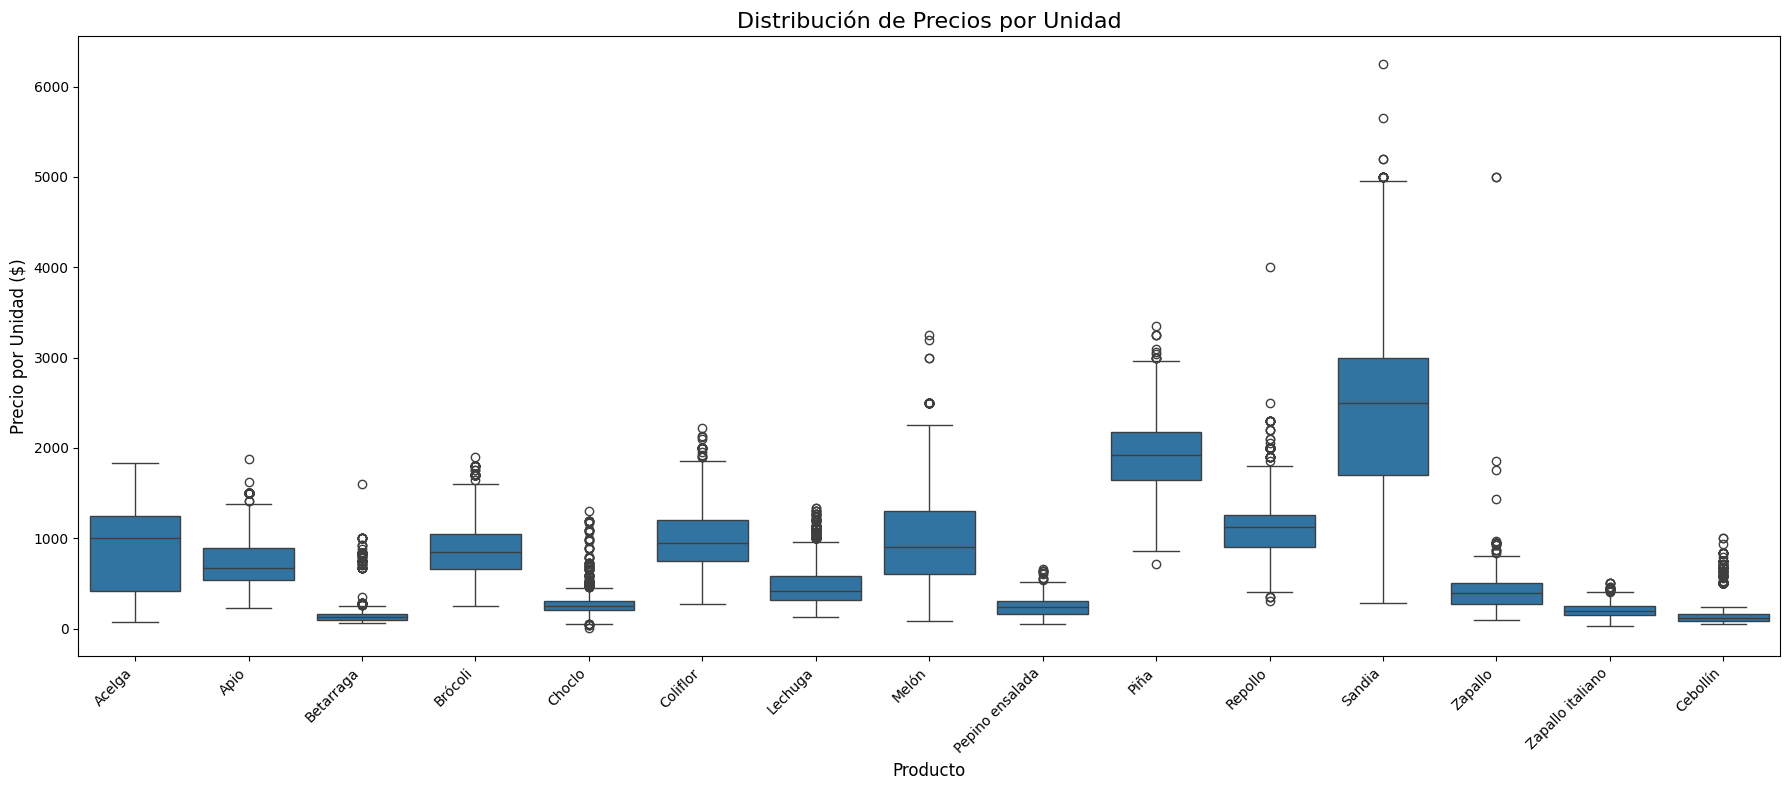

In [ ]:
plt.figure(figsize=(18, 8))
sns.boxplot(data=df_top_unidades, x='producto', y='precio_por_unidad')
plt.title('Distribución de Precios por Unidad', fontsize=16)
plt.xlabel('Producto', fontsize=12)
plt.ylabel('Precio por Unidad ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Analisis explotatorio de datos

#### ¿Qué productos tienen los precios de compra más estables a lo largo del año?

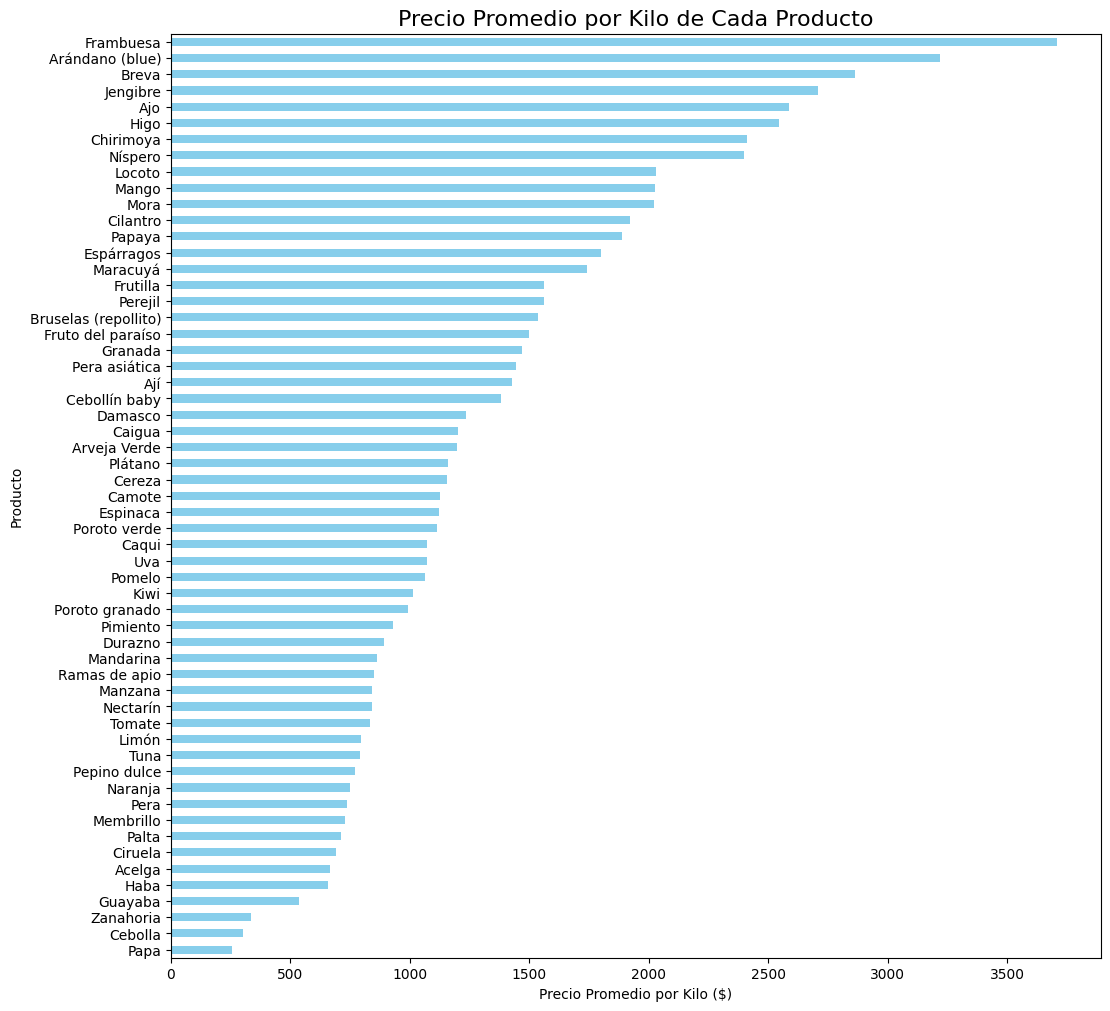

In [ ]:
# Filtramos para quedarnos solo con las filas que tienen precio por kilo
df_kg = df1[df1['precio_por_kg'].notna()]

# Calculamos el precio promedio por producto usando el DataFrame filtrado
precio_promedio_producto = df_kg.groupby('producto')['precio_por_kg'].mean().sort_values()

# Creamos el gráfico de barras
plt.figure(figsize=(12, 12))
precio_promedio_producto.plot(kind='barh', color='skyblue')
plt.title('Precio Promedio por Kilo de Cada Producto', fontsize=16)
plt.xlabel('Precio Promedio por Kilo ($)')
plt.ylabel('Producto')
plt.show()

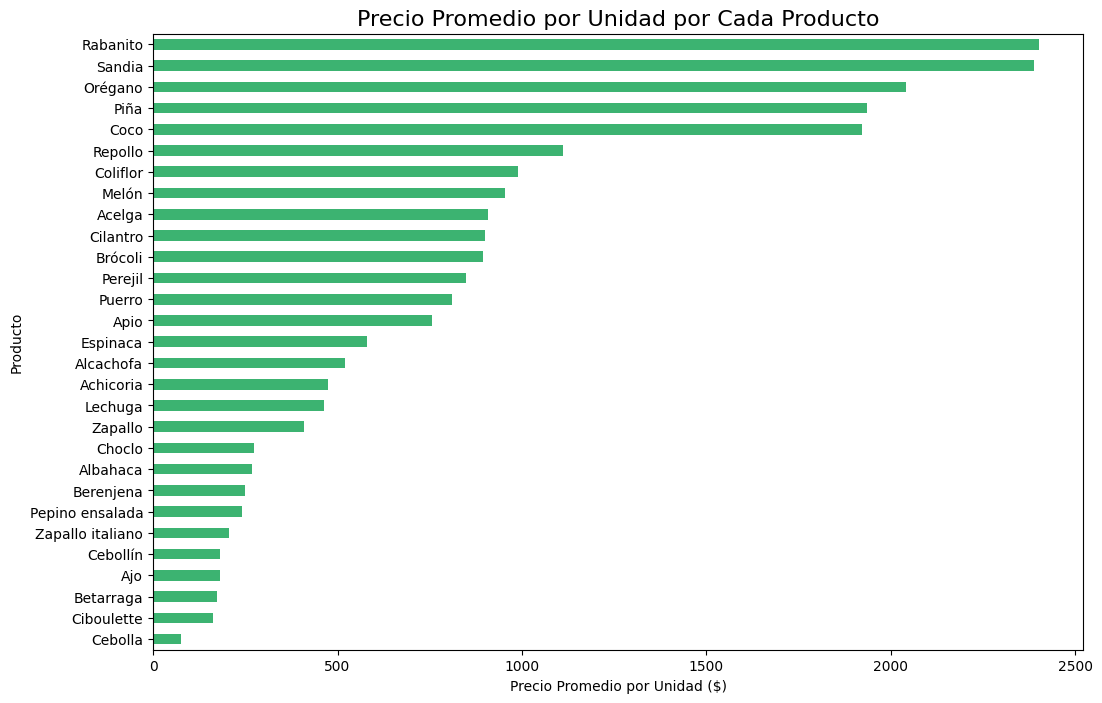

In [ ]:
# Filtramos para quedarnos solo con las filas que tienen precio por unidad
df_unidad = df1[df1['precio_por_unidad'].notna()]

# Calculamos el precio promedio por producto usando el DataFrame filtrado
precio_promedio_unidad = df_unidad.groupby('producto')['precio_por_unidad'].mean().sort_values()

# Creamos el gráfico de barras
plt.figure(figsize=(12, 8))
precio_promedio_unidad.plot(kind='barh', color='mediumseagreen')
plt.title('Precio Promedio por Unidad por Cada Producto', fontsize=16)
plt.xlabel('Precio Promedio por Unidad ($)')
plt.ylabel('Producto')
plt.show()

Los productos en la parte inferior de las listas como `papa`, `cebolla`, `zanahoria`, `ciboulette`, `betarraga`, `ajo`, `cebollin` y `zappallo italiano` son claramente los que tienen el menor costo de adquisición promedio.

#### ¿Cuáles son los productos más importantes o con mayor volumen de comercialización?

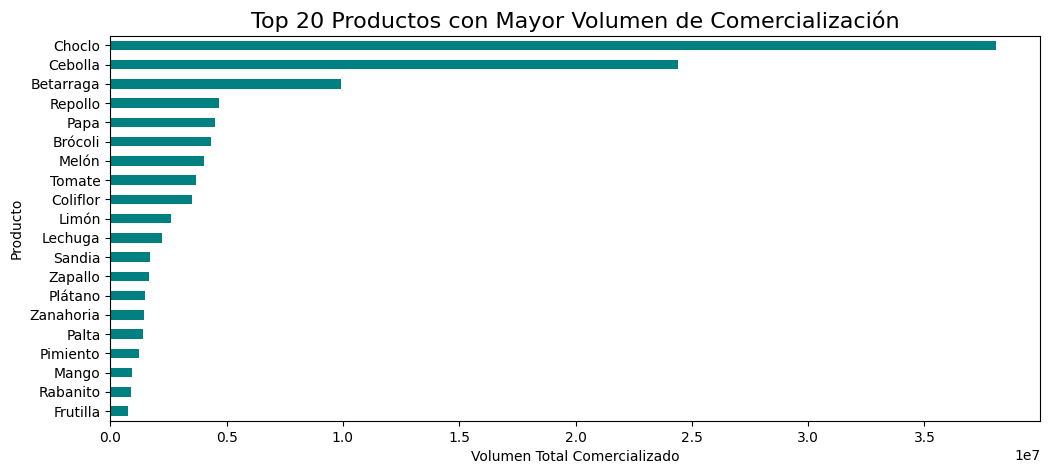

In [ ]:
# Agrupamos por producto y sumamos el volumen total
volumen_por_producto = df1.groupby('producto')['volumen'].sum().sort_values()

# Creamos el gráfico de barras para los 20 productos con más volumen
plt.figure(figsize=(12, 5))
volumen_por_producto.tail(20).plot(kind='barh', color='teal')
plt.title('Top 20 Productos con Mayor Volumen de Comercialización', fontsize=16)
plt.xlabel('Volumen Total Comercializado')
plt.ylabel('Producto')
plt.show()

Este gráfico contiene información sumamente importante y nos muestra los protagonistas del mercado. 

Al cruzar esta información con la de los precios bajos, se puede tomar una decisión mucho más estratégica: elegir productos que no solo sean baratos, sino que también tengan un alto volumen de ventas.

#### ¿Qué productos tienen la mayor diversidad de variedades en el mercado?

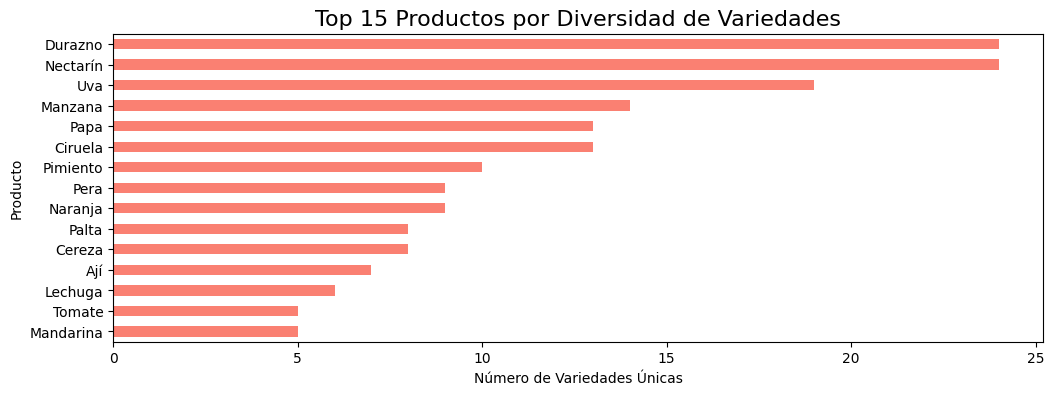

In [ ]:
# Filtramos para excluir las variedades "Sin especificar" que no aportan información
df_variedades = df1[df1['variedad_tipo'] != 'Sin especificar']

# Contamos las variedades únicas para cada producto
conteo_variedades = df_variedades.groupby('producto')['variedad_tipo'].nunique().sort_values()

# Creamos el gráfico de barras para los productos con más variedades
plt.figure(figsize=(12, 4))
conteo_variedades.tail(15).plot(kind='barh', color='salmon')
plt.title('Top 15 Productos por Diversidad de Variedades', fontsize=16)
plt.xlabel('Número de Variedades Únicas')
plt.ylabel('Producto')
plt.show()

Esta información podría ser clave para la estrategia de marketing y/o posicionamiento de la empresa:

Oportunidad de Especialización: Para los productos de alta diversidad (como manzana), FRESCORP S.A. se podría diferenciarse de la competencia convirtiéndose en el lugar para encontrar variedades que otros supermercados no ofrecen.

Estrategia de Volumen: Para los productos de baja diversidad, la estrategia debe centrarse en la eficiencia es decir, ofrecer un producto de buena calidad al precio más competitivo posible, ya que no hay diferenciación por variedad.


#### ¿Cuáles son los meses de "temporada baja" (precios más baratos) para los productos populares?

In [ ]:
# Identificar los 5 productos más populares por volumen de los productos que se venden por kilo

 # Filtramos por productos que se venden por kilo
df_kg = df1[df1['precio_por_kg'].notna()]
volumen_total = df_kg.groupby('producto')['volumen'].sum()
productos_populares = volumen_total.nlargest(5).index.tolist()

print(f"Analizando los 5 productos más populares vendidos por kilo: {productos_populares}")

Analizando los 5 productos más populares vendidos por kilo: ['Papa', 'Tomate', 'Cebolla', 'Limón', 'Plátano']


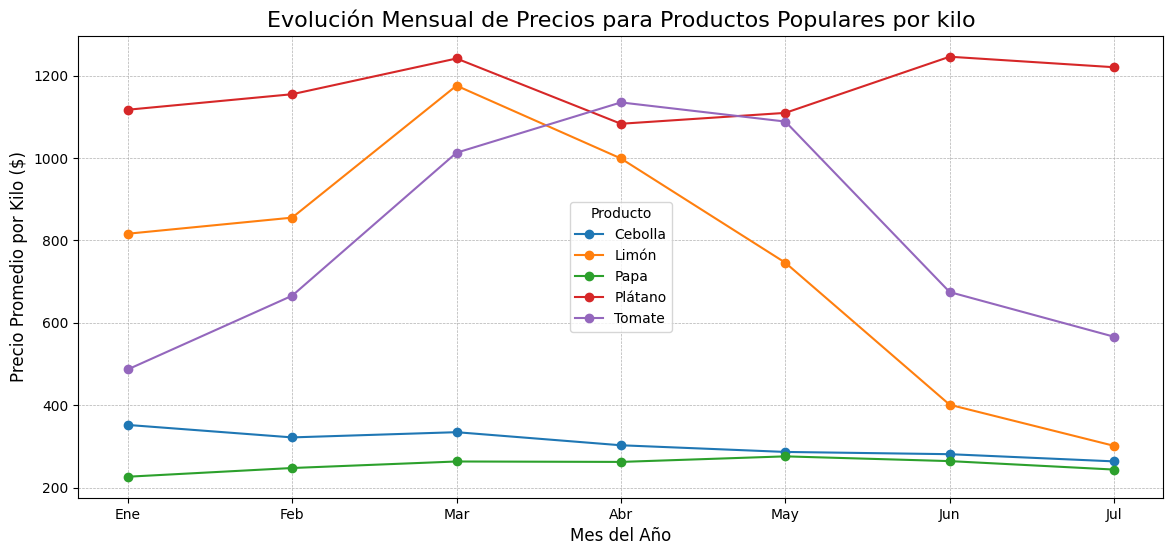

In [ ]:
# Preparar los datos y crear el gráfico 

# Filtramos el DataFrame para estos productos
df_filtrado = df_kg[df_kg['producto'].isin(productos_populares)]

# Agrupamos por mes y producto para calcular el precio promedio
precio_mensual = df_filtrado.groupby(['mes', 'producto'])['precio_por_kg'].mean().unstack()

# Creamos el gráfico de líneas
precio_mensual.plot(figsize=(14, 6), marker='o', linestyle='-')

plt.title('Evolución Mensual de Precios para Productos Populares por kilo', fontsize=16)
plt.xlabel('Mes del Año', fontsize=12)
plt.ylabel('Precio Promedio por Kilo ($)', fontsize=12)
plt.xticks(ticks=range(1, 8), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul'])
plt.legend(title='Producto')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [ ]:
# Identificar los 5 productos más populares por volumen de los productos que se venden por unidad

# Filtramos por productos que se venden por unidad
df_unidades = df1[df1['precio_por_unidad'].notna()]
# Usamos el conteo de registros para definir popularidad, ya que el volumen puede no ser comparable
productos_populares_unidad = df_unidades['producto'].value_counts().nlargest(5).index.tolist()

print(f"Analizando los 5 productos más populares vendidos por unidad: {productos_populares_unidad}")

Analizando los 5 productos más populares vendidos por unidad: ['Lechuga', 'Repollo', 'Piña', 'Melón', 'Brócoli']


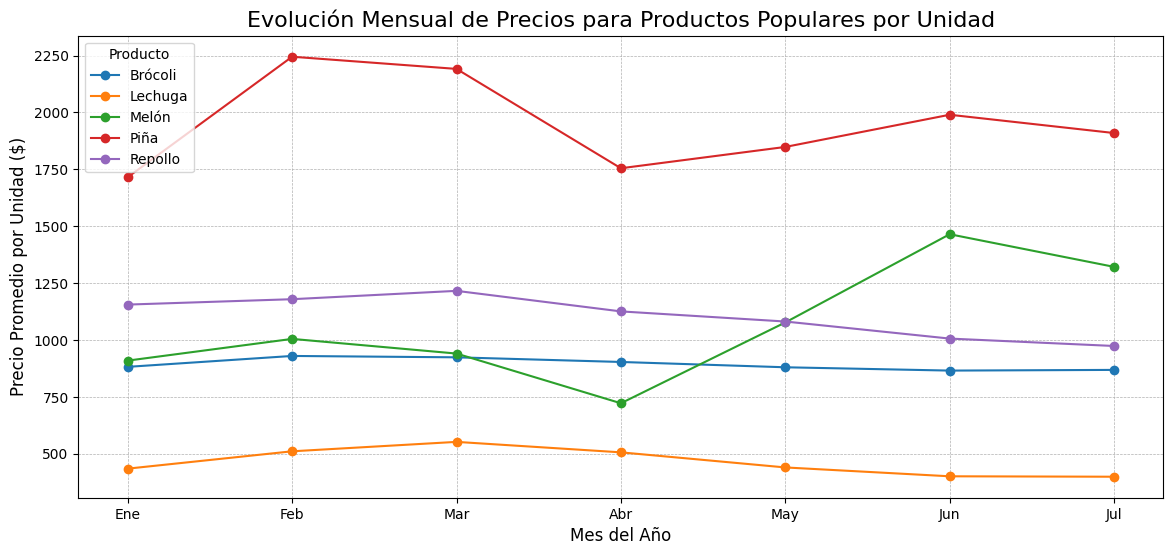

In [ ]:
# Preparar los datos y crear el gráfico

# Filtramos el DataFrame para estos productos
df_filtrado_unidad = df_unidades[df_unidades['producto'].isin(productos_populares_unidad)]

# Agrupamos por mes y producto para calcular el precio promedio
precio_mensual_unidad = df_filtrado_unidad.groupby(['mes', 'producto'])['precio_por_unidad'].mean().unstack()

# Creamos el gráfico de líneas
precio_mensual_unidad.plot(figsize=(14, 6), marker='o', linestyle='-')

plt.title('Evolución Mensual de Precios para Productos Populares por Unidad', fontsize=16)
plt.xlabel('Mes del Año', fontsize=12)
plt.ylabel('Precio Promedio por Unidad ($)', fontsize=12)
# Modificamos los ticks del eje X como solicitaste
plt.xticks(ticks=range(1, 8), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul'])
plt.legend(title='Producto')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

Ambas gráficas revelan fuertes patrones estacionales, pero de diferente tipo:

Productos por Kilo: Aquí la estacionalidad es mixta. El Tomate y el Limón tienen temporadas muy marcadas, con precios altos en los meses de verano (Ene-Mar) y precios que bajan invierno (Jun-Jul). En cambio, la Papa y Cebolla e incluso el Platano son extremadamente estables, con precios bajos y casi sin variación durante probablemente, todo el año.

Productos por Unidad: Casi todos los productos siguen un patrón similar excepto por el Melón con una notable alza en invierno.



#### ¿Qué productos sufren las mayores alzas de precio?

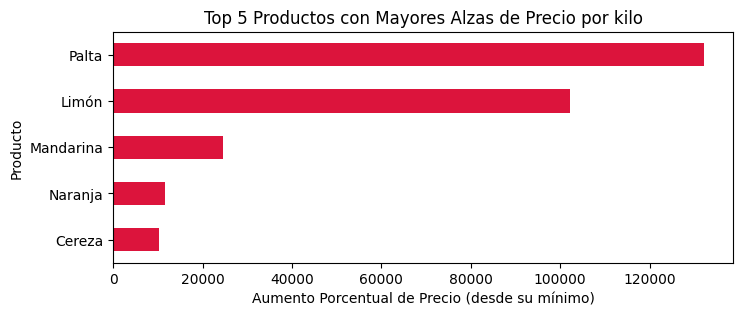

In [ ]:
# Filtramos por productos que se venden por kilo
df_kg = df1[df1['precio_por_kg'].notna()]

# Agrupamos por producto y encontramos el precio mínimo y máximo registrado
rango_precios = df_kg.groupby('producto')['precio_por_kg'].agg(['min', 'max'])

# Calculamos el alza de precio en porcentaje
# Fórmula: ((Precio Máximo - Precio Mínimo) / Precio Mínimo) * 100
rango_precios['alza_porcentaje'] = ((rango_precios['max'] - rango_precios['min']) / rango_precios['min']) * 100

# Ordenamos para ver los productos con mayores alzas primero
mayores_alzas = rango_precios.sort_values(by='alza_porcentaje', ascending=False)

# --- Visualización ---
plt.figure(figsize=(8, 3))
mayores_alzas['alza_porcentaje'].head(5).sort_values().plot(kind='barh', color='crimson')
plt.title('Top 5 Productos con Mayores Alzas de Precio por kilo', fontsize=12)
plt.xlabel('Aumento Porcentual de Precio (desde su mínimo)')
plt.ylabel('Producto')
plt.show()

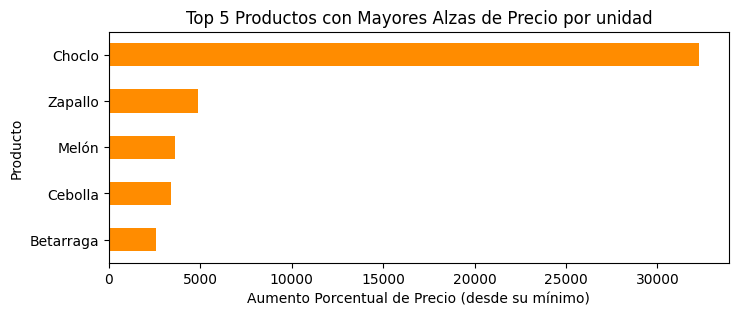

In [ ]:
# Filtramos por productos que se venden por unidad
df_unidad = df1[df1['precio_por_unidad'].notna()]

# Agrupamos por producto y encontramos el precio mínimo y máximo registrado
rango_precios_unidad = df_unidad.groupby('producto')['precio_por_unidad'].agg(['min', 'max'])

# Calculamos el alza de precio en porcentaje
rango_precios_unidad['alza_porcentaje'] = ((rango_precios_unidad['max'] - rango_precios_unidad['min']) / rango_precios_unidad['min']) * 100

# Ordenamos para ver los productos con mayores alzas primero
mayores_alzas_unidad = rango_precios_unidad.sort_values(by='alza_porcentaje', ascending=False)

# --- Visualización ---
plt.figure(figsize=(8, 3))
mayores_alzas_unidad['alza_porcentaje'].head(5).sort_values().plot(kind='barh', color='darkorange')
plt.title('Top 5 Productos con Mayores Alzas de Precio por unidad', fontsize=12)
plt.xlabel('Aumento Porcentual de Precio (desde su mínimo)')
plt.ylabel('Producto')
plt.show()

Productos con Mayores Alzas de Precio por kilo: Los productos mas populares que son afectados por las mayores alzas de precio están compuesto en su totalidad por frutas con una temporada de cosecha muy marcada. Esto indica que su precio es extremadamente sensible a la estacionalidad. Cuando están fuera de temporada, su escasez provoca que el precio se dispare, explicando las enormes alzas porcentuales desde su punto más bajo.

Productos con Mayores Alzas de Precio por unidad: Vemos productos con una fuerte dependencia de la temporada de cosecha, como el Choclo y el Melón. Aunque otros como la Cebolla y el Zapallo están disponibles todo el año, sus precios también varían según la época de mayor oferta.

El mayor riesgo de alzas de precios proviene de productos con una fuerte estacionalidad. La estrategia de FRESCORP debe estar íntimamente ligada al calendario agrícola.

#### ¿Hay días específicos de la semana en los que los precios mayoristas tienden a ser más bajos?

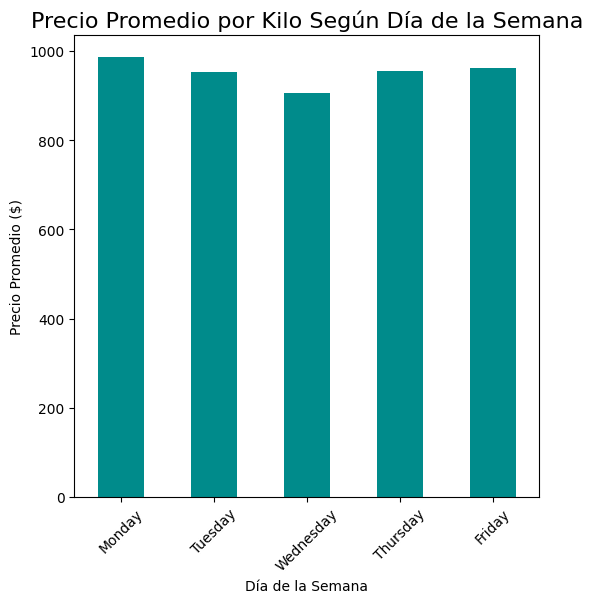

In [ ]:
# Ordenamos los días de la semana
dias_ordenados = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df1['dia_semana'] = pd.Categorical(df1['dia_semana'], categories=dias_ordenados, ordered=True)

# Calculamos el precio promedio por día
precio_por_dia = df1.groupby('dia_semana', observed=True)['precio_por_kg'].mean()

# Creamos el gráfico de barras
plt.figure(figsize=(6, 6))
precio_por_dia.plot(kind='bar', color='darkcyan')
plt.title('Precio Promedio por Kilo Según Día de la Semana', fontsize=16)
plt.xlabel('Día de la Semana')
plt.ylabel('Precio Promedio ($)')
plt.xticks(rotation=45)
plt.show()

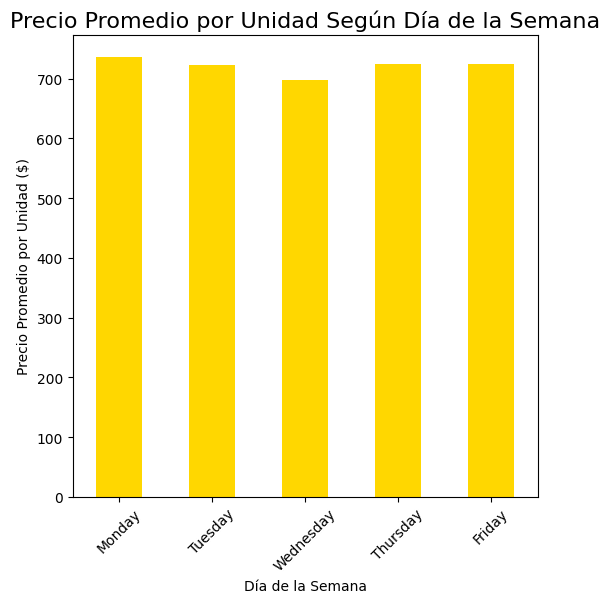

In [ ]:
# Filtramos Y creamos una copia explícita para evitar la advertencia
df_unidades = df1[df1['precio_por_unidad'].notna()].copy()

# Ordenamos los días de la semana (esta línea ya no generará la advertencia)
dias_ordenados = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_unidades['dia_semana'] = pd.Categorical(df_unidades['dia_semana'], categories=dias_ordenados, ordered=True)

# Calculamos el precio promedio por día
precio_por_dia_unidad = df_unidades.groupby('dia_semana', observed=True)['precio_por_unidad'].mean()

# Creamos el gráfico de barras para una fácil visualización
plt.figure(figsize=(6, 6))
precio_por_dia_unidad.plot(kind='bar', color='gold')
plt.title('Precio Promedio por Unidad Según Día de la Semana', fontsize=16)
plt.xlabel('Día de la Semana')
plt.ylabel('Precio Promedio por Unidad ($)')
plt.xticks(rotation=45)
plt.show()

Basado en los gráficos, no existe una relación clara o significativa entre el día de la semana y el precio promedio de los productos.
Aunque puede haber diferencias mínimas, por ejemplo, el miércoles parece ser marginalmente más barato, la altura de las barras para todos los días es muy similar. 

No hay un día que destaque como consistentemente más económico. 
Por ende, no hay evidencia en los datos que sugiera una ventaja estratégica en comprar en un día específico de la semana



#### ¿En qué mercados es más barato comprar productos populares?

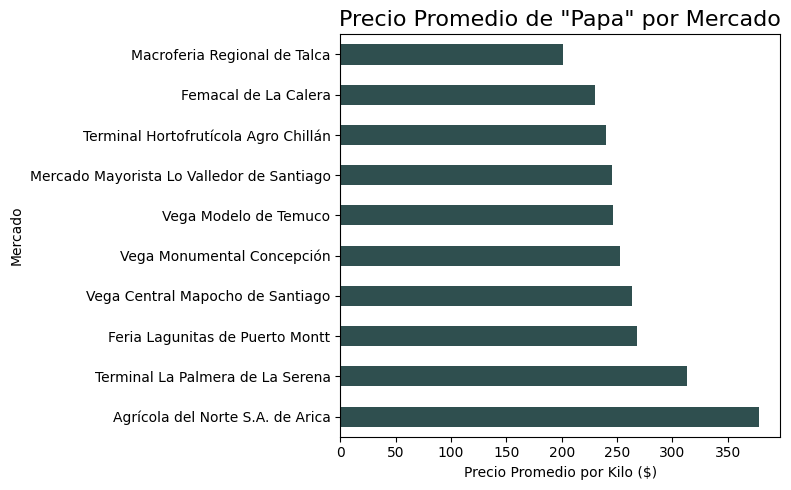

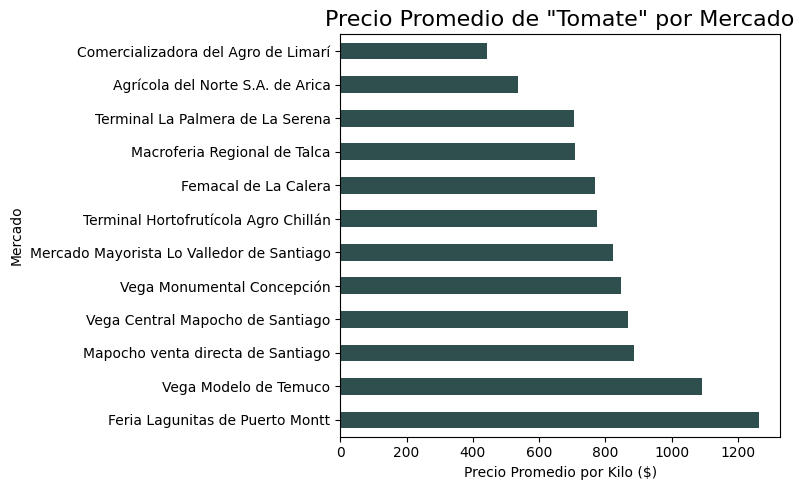

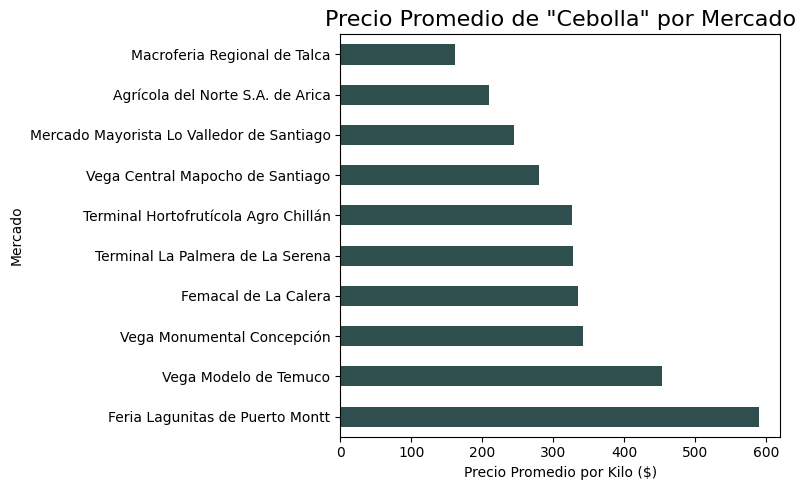

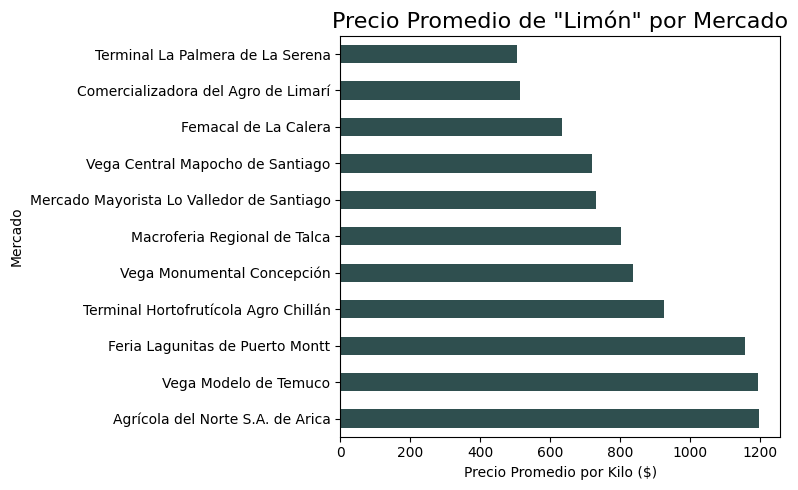

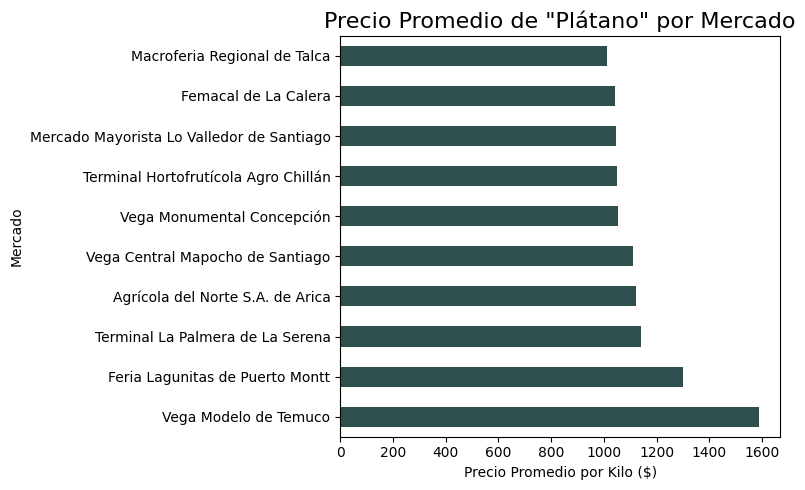

In [ ]:
# Filtramos el DataFrame usando la variable 'productos_populares' que contiene los 5 productos más populares por kilo
df_mercado = df1[df1['producto'].isin(productos_populares) & df1['precio_por_kg'].notna()]


# Creamos un gráfico para cada producto ---
for producto in productos_populares:
    plt.figure(figsize=(8, 5))

    # Agrupamos por mercado y calculamos el precio promedio
    precios_mercado = df_mercado[df_mercado['producto'] == producto].groupby('mercado')['precio_por_kg'].mean().sort_values(ascending=False)

    # Creamos el gráfico de barras
    precios_mercado.plot(kind='barh', color='darkslategray')
    plt.title(f'Precio Promedio de "{producto}" por Mercado', fontsize=16)
    plt.xlabel('Precio Promedio por Kilo ($)')
    plt.ylabel('Mercado')
    plt.tight_layout()
    plt.show()

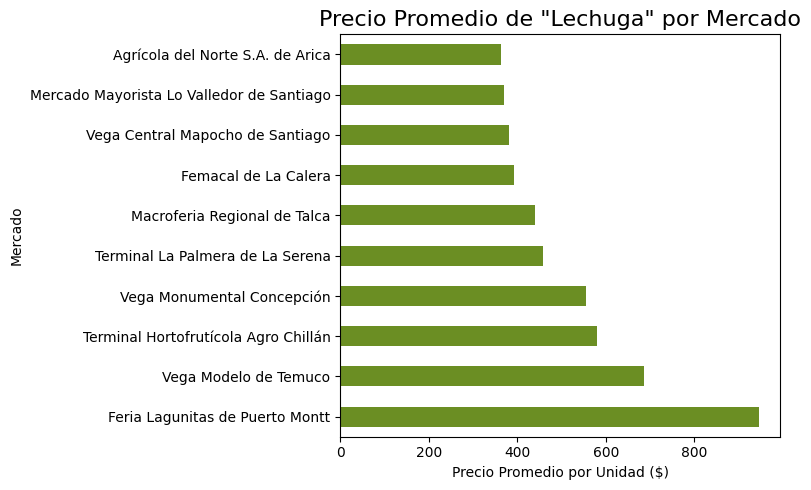

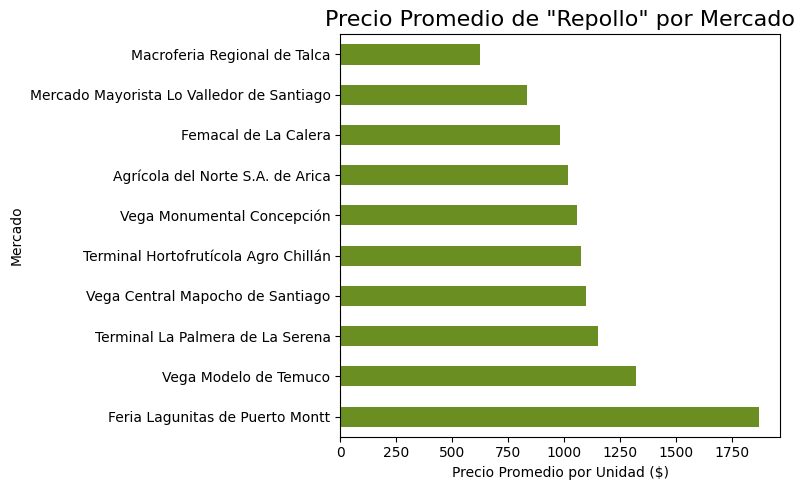

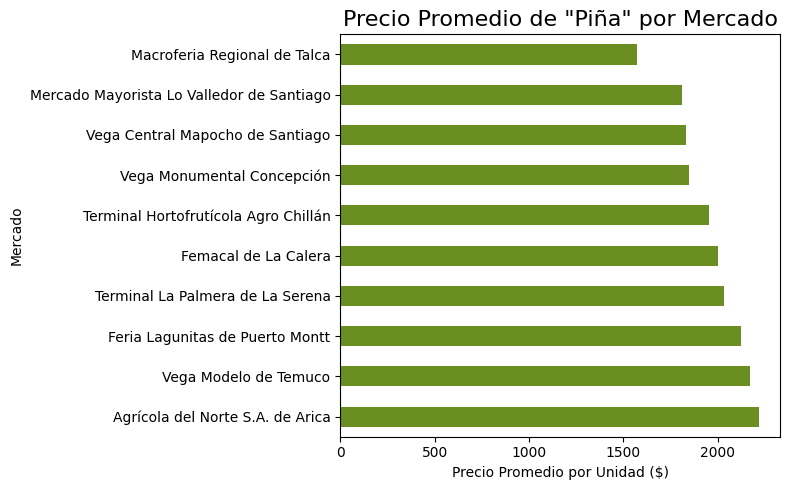

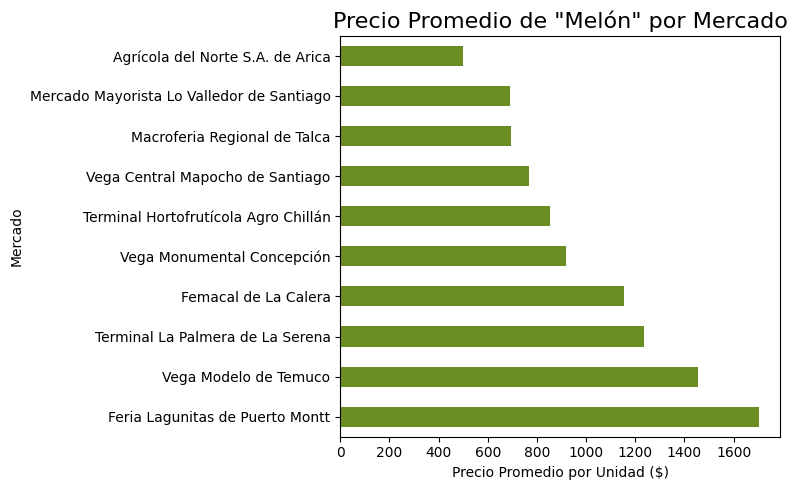

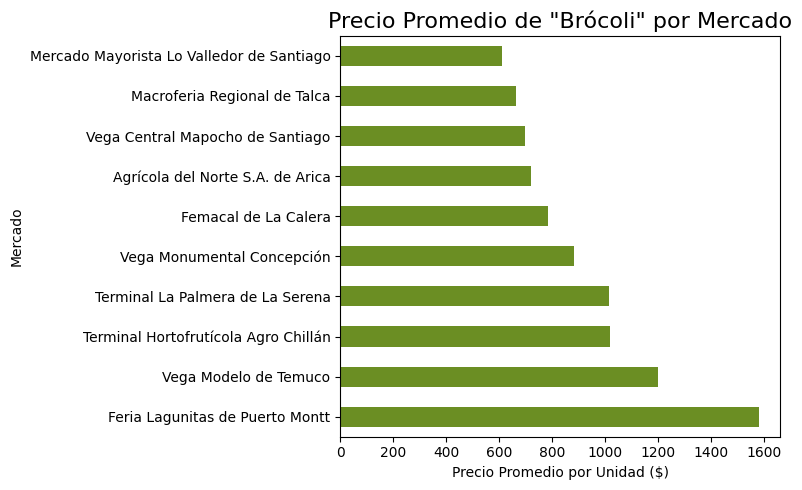

In [ ]:
# Filtramos el DataFrame usando la variable 'productos_populares_unidad' que contiene los 5 productos más populares por unidad
df_mercado_unidad = df1[df1['producto'].isin(productos_populares_unidad) & df1['precio_por_unidad'].notna()]


# Creamos un gráfico para cada producto 
for producto in productos_populares_unidad:
    plt.figure(figsize=(8, 5))

    # Agrupamos por mercado y calculamos el precio promedio
    precios_mercado = df_mercado_unidad[df_mercado_unidad['producto'] == producto].groupby('mercado')['precio_por_unidad'].mean().sort_values(ascending=False)

    # Creamos el gráfico de barras
    precios_mercado.plot(kind='barh', color='olivedrab')
    plt.title(f'Precio Promedio de "{producto}" por Mercado', fontsize=16)
    plt.xlabel('Precio Promedio por Unidad ($)')
    plt.ylabel('Mercado')
    plt.tight_layout()
    plt.show()

La identificación de los mercados con los precios promedio más bajos representa una pieza clave de inteligencia de mercado. Con esta información, el siguiente paso estratégico para FRESCORP S.A. es realizar un análisis exhaustivo de factibilidad logística y de transporte.

Optimizar el origen de los productos no solo permitirá maximizar el margen de ganancia, sino que también podría traducirse en una ventaja competitiva al ofrecer precios más atractivos a los clientes finales.

#### Ranking de productos populares que combinan bajo costo, alto volumen y buena estabilidad


In [ ]:
# ANALISIS DE PRODUCTOS POPULARES (POR KILO)

# Filtramos el DataFrame para trabajar solo con productos que tienen un precio_por_kg válido.
df_kg = df1[df1['precio_por_kg'].notna()].copy()

# Calculamos las tres métricas clave:
# Métrica de Costo: Se calcula el precio promedio por kilo.
costo_promedio = df_kg.groupby('producto')['precio_por_kg'].mean()
# Métrica de Volumen: Se suma el volumen total comercializado.
volumen_total = df_kg.groupby('producto')['volumen'].sum()
# Métrica de Estabilidad: Se calcula el Coeficiente de Variación (CV) y luego su inverso.
# Un CV bajo significa alta estabilidad, por lo que el inverso nos da un valor donde "más alto es más estable".
stats_productos = df_kg.groupby('producto')['precio_por_kg'].agg(['mean', 'std']).dropna()
stats_productos['estabilidad'] = 1 / (stats_productos['std'] / stats_productos['mean'])

# Combinamos las tres métricas calculadas en una nueva tabla para facilitar el ranking.
df_ranking = pd.DataFrame({
    'costo_promedio': costo_promedio,
    'volumen_total': volumen_total,
    'estabilidad': stats_productos['estabilidad']
}).dropna()

# Normalizar usando Ranking Percentil:
# Este método es robusto contra outliers. Asigna un puntaje de 0.0 a 1.0 basado en la posición del producto en el ranking.
# Para el costo, `ascending=False` asegura que un precio más bajo obtenga un puntaje más alto.
df_ranking['puntaje_costo'] = df_ranking['costo_promedio'].rank(ascending=False, pct=True)
df_ranking['puntaje_volumen'] = df_ranking['volumen_total'].rank(pct=True)
df_ranking['puntaje_estabilidad'] = df_ranking['estabilidad'].rank(pct=True)

# Se promedian los tres puntajes para obtener una métrica final que balancea costo, volumen y estabilidad.
df_ranking['puntaje_ideal'] = (df_ranking['puntaje_costo'] + df_ranking['puntaje_volumen'] + df_ranking['puntaje_estabilidad']) / 3

# Se ordena el DataFrame por el puntaje ideal en orden descendente para mostrar los mejores productos primero.
df_resultado_final = df_ranking.sort_values(by='puntaje_ideal', ascending=False)

print("Ranking de Productos 'Ideales por kilo':")
display(df_resultado_final.head(10))

Ranking de Productos 'Ideales por kilo':


,costo_promedio,volumen_total,estabilidad,puntaje_costo,puntaje_volumen,puntaje_estabilidad,puntaje_ideal
producto,,,,,,,
Papa,255.266331,4483830,4.580867,1.000000,1.000000,0.736842,0.912281
Zanahoria,333.360819,1468499,2.478934,0.964912,0.912281,0.350877,0.742690
Poroto granado,990.387554,289962,6.040208,0.631579,0.701754,0.877193,0.736842
Acelga,665.385054,209221,3.886039,0.912281,0.614035,0.631579,0.719298
Pera,738.692176,348683,3.184600,0.842105,0.754386,0.491228,0.695906
Cebolla,303.011080,3212937,1.949697,0.982456,0.964912,0.105263,0.684211
Durazno,893.829443,234512,4.117341,0.666667,0.649123,0.701754,0.672515
Plátano,1161.477469,1501210,3.757384,0.473684,0.929825,0.614035,0.672515
Nectarín,839.952886,341284,3.354090,0.736842,0.736842,0.526316,0.666667


In [ ]:
# ANALISIS DE PRODUCTOS POPULAARES (POR UNIDAD)

# Filtramos el DataFrame para trabajar solo con productos que tienen un precio_por_unidad válido.
df_unidades = df1[df1['precio_por_unidad'].notna()].copy()

# Calculamos las tres métricas clave:

# Métrica de Costo: Se calcula el precio promedio por kilo.
costo_promedio_unidad = df_unidades.groupby('producto')['precio_por_unidad'].mean()
# Métrica de Volumen: Se suma el volumen total comercializado.
volumen_total_unidad = df_unidades.groupby('producto')['volumen'].sum()
# Métrica de Estabilidad: Se calcula el Coeficiente de Variación (CV) y luego su inverso.
# Un CV bajo significa alta estabilidad, por lo que el inverso nos da un valor donde "más alto es más estable".
stats_productos_unidad = df_unidades.groupby('producto')['precio_por_unidad'].agg(['mean', 'std']).dropna()
stats_productos_unidad['estabilidad'] = 1 / (stats_productos_unidad['std'] / stats_productos_unidad['mean'])

# Combinamos las tres métricas calculadas en una nueva tabla para facilitar el ranking.
df_ranking_unidad = pd.DataFrame({
    'costo_promedio': costo_promedio_unidad,
    'volumen_total': volumen_total_unidad,
    'estabilidad': stats_productos_unidad['estabilidad']
}).dropna()

# Normalizamos usando Ranking Percentil:
# Este método es robusto contra outliers. Asigna un puntaje de 0.0 a 1.0 basado en la posición del producto en el ranking.
# Para el costo, `ascending=False` asegura que un precio más bajo obtenga un puntaje más alto.
df_ranking_unidad['puntaje_costo'] = df_ranking_unidad['costo_promedio'].rank(ascending=False, pct=True)
df_ranking_unidad['puntaje_volumen'] = df_ranking_unidad['volumen_total'].rank(pct=True)
df_ranking_unidad['puntaje_estabilidad'] = df_ranking_unidad['estabilidad'].rank(pct=True)

# Se promedian los tres puntajes para obtener una métrica final que balancea costo, volumen y estabilidad.
df_ranking_unidad['puntaje_ideal'] = (df_ranking_unidad['puntaje_costo'] + df_ranking_unidad['puntaje_volumen'] + df_ranking_unidad['puntaje_estabilidad']) / 3

# Se ordena el DataFrame por el puntaje ideal en orden descendente para mostrar los mejores productos primero.
df_resultado_final_unidad = df_ranking_unidad.sort_values(by='puntaje_ideal', ascending=False)

print("Ranking de Productos 'Ideales' por Unidad:")
display(df_resultado_final_unidad.head(10))

Ranking de Productos 'Ideales' por Unidad:


,costo_promedio,volumen_total,estabilidad,puntaje_costo,puntaje_volumen,puntaje_estabilidad,puntaje_ideal
producto,,,,,,,
Cebolla,76.702030,21210138,1.995071,1.000000,0.965517,0.310345,0.758621
Choclo,274.366345,38073258,1.968886,0.689655,1.000000,0.275862,0.655172
Brócoli,894.539319,4335058,2.887215,0.379310,0.862069,0.689655,0.643678
Berenjena,248.496831,111362,3.287302,0.758621,0.310345,0.827586,0.632184
Betarraga,173.495815,9936855,0.989717,0.931034,0.931034,0.034483,0.632184
Zapallo italiano,205.213607,401757,2.487384,0.827586,0.517241,0.551724,0.632184
Repollo,1111.454842,4667935,3.148405,0.206897,0.896552,0.793103,0.632184
Pepino ensalada,242.503769,479042,2.367949,0.793103,0.551724,0.448276,0.597701
Coliflor,990.181849,3503076,3.028189,0.241379,0.793103,0.758621,0.597701


Con el ranking podemos ver todos los productos de bajo riesgo y alta recompensa que combinan un precio de compra bajo y estable con un volumen de ventas masivo. Son la base sobre la cual FRESCORP debe construir su inventario.

Los productos que no aparecen en los primeros lugares de estos rankings deben ser tratados como "productos de oportunidad", es decir,  comprarlos y promocionarlos en su temporada baja de precios, pero sin depender de ellos como el núcleo del negocio inicial.

#### Recomendación estratégica

* Cartera de Productos: 

El análisis integral de costo, volumen y estabilidad de precios ha identificado un grupo claro de productos ganadores que deberían formar el núcleo de la oferta inicial.

Productos por Kilo: La Papa, la Cebolla y el Zapallo destacan como los productos más ideales. Ofrecen la mejor combinación posible: un costo de adquisición bajo, un volumen de ventas masivo en el mercado y precios notablemente estables a lo largo del año. Son la base de bajo riesgo y alta recompensa sobre la cual construir el negocio.

Productos por Unidad: La Betarraga, el Zapallo y el Melón se posicionan como los ganadores en esta categoría, ofreciendo una excelente predictibilidad en su costo y son el complemento perfecto para diversificar la oferta.


* Estrategia de Precios:

La estacionalidad es el factor más influyente en la estrategia de precios. Los productos se pueden dividir en dos grupos:

Estables (Riesgo Bajo): La Papa, Cebolla y Zapallo mantienen precios constantes, lo que permite ofrecer precios competitivos y predecibles durante todo el año.

Estacionales (Riesgo Alto): Frutas como la Palta, Limón, Mandarina y productos como el Choclo y el Melón sufren alzas de precio muy significativas. Su compra debe ser dinámica y sus promociones deben concentrarse en los meses de cosecha para aprovechar los bajos costos.


* Optimización de la Cadena de Suministro:

El análisis demostró que no existe un día de la semana específico que ofrezca una ventaja de precios consistente. Por lo tanto, el foco de la optimización no debe estar en el día de la compra.

Se encontraron diferencias de precios significativas entre los distintos mercados mayoristas para los mismos productos de lo cual habría que realizar una exploración exahustiva para verificar la factibilidad, logistica y transporte para priorizar la compra en estos mercados.


#### Conclusión 

FRESCORP tiene una clara oportunidad para entrar exitosamente en el mercado de frutas y hortalizas. La clave del éxito no está en ofrecer de todo, sino en empezar con una cartera de productos inteligente, basada en aquellos que son baratos, populares y estables, y gestionar dinámicamente los productos más volátiles según el calendario agrícola. Finalmente, la optimización de la ruta de compra será fundamental para maximizar los márgenes de ganancia.